In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
filepath = "/kaggle/input/stocks/"

In [4]:
df = pd.read_csv(filepath + "full_data_1.csv")
df

,ticker,timestamp,open,high,low,close,volume,bu,sd,fn,...,bollinger_hband,bollinger_lband,ema50,ema200,PB,PE,ROE,EPS,RevenueGrowth,ProfitGrowth
0,AAM,2023-01-03,11284.80,11284.80,11002.68,11190.76,3601.0,2900.0,700.0,0.0,...,NaN,NaN,NaN,NaN,0.593207,6.902934,0.088896,215.021674,2.369848,28.304855
1,AAM,2023-01-04,10673.54,11002.68,10673.54,10908.64,3900.0,1500.0,2400.0,-1145000.0,...,NaN,NaN,NaN,NaN,0.593207,6.902934,0.088896,215.021674,2.369848,28.304855
2,AAM,2023-01-05,10438.44,11190.76,10438.44,11190.76,2332.0,2200.0,100.0,0.0,...,NaN,NaN,NaN,NaN,0.593207,6.902934,0.088896,215.021674,2.369848,28.304855
3,AAM,2023-01-06,11002.68,11143.74,10955.66,10955.66,600.0,600.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.593207,6.902934,0.088896,215.021674,2.369848,28.304855
4,AAM,2023-01-09,11284.80,11284.80,10908.64,10955.66,441.0,400.0,0.0,1200000.0,...,NaN,NaN,NaN,NaN,0.593207,6.902934,0.088896,215.021674,2.369848,28.304855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040146,VXT,2025-08-25,11000.00,11000.00,11000.00,11000.00,0.0,0.0,0.0,0.0,...,11000.0,11000.0,11055.387426,11610.338077,1.529654,3.503750,0.311467,NaN,NaN,NaN
1040147,VXT,2025-08-26,11000.00,11000.00,11000.00,11000.00,0.0,0.0,0.0,0.0,...,11000.0,11000.0,11053.215370,11604.265061,1.529654,3.503750,0.311467,NaN,NaN,NaN
1040148,VXT,2025-08-27,11000.00,11000.00,11000.00,11000.00,0.0,0.0,0.0,0.0,...,11000.0,11000.0,11051.128493,11598.252474,1.529654,3.503750,0.311467,NaN,NaN,NaN
1040149,VXT,2025-08-28,11000.00,11000.00,11000.00,11000.00,0.0,0.0,0.0,0.0,...,11000.0,11000.0,11049.123454,11592.299713,1.529654,3.503750,0.311467,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040151 entries, 0 to 1040150
Data columns (total 27 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   ticker           1040151 non-null  object 
 1   timestamp        1040151 non-null  object 
 2   open             1036858 non-null  float64
 3   high             1036858 non-null  float64
 4   low              1036858 non-null  float64
 5   close            1036858 non-null  float64
 6   volume           1036858 non-null  float64
 7   bu               1038982 non-null  float64
 8   sd               1038982 non-null  float64
 9   fn               1038182 non-null  float64
 10  fs               1038182 non-null  float64
 11  fb               1038182 non-null  float64
 12  rsi              1019295 non-null  float64
 13  mfi              802891 non-null   float64
 14  macd             996900 non-null   float64
 15  macd_signal      984126 non-null   float64
 16  macd_diff        9

In [6]:
df.describe()

,open,high,low,close,volume,bu,sd,fn,fs,fb,...,bollinger_hband,bollinger_lband,ema50,ema200,PB,PE,ROE,EPS,RevenueGrowth,ProfitGrowth
count,1.036858e+06,1.036858e+06,1.036858e+06,1.036858e+06,1.036858e+06,1.038982e+06,1.038982e+06,1.038182e+06,1.038182e+06,1.038182e+06,...,1.006482e+06,1.006482e+06,9.585900e+05,720347.000000,738805.000000,738833.000000,739928.000000,751964.000000,726849.000000,727143.000000
mean,1.849256e+04,1.866839e+04,1.831023e+04,1.849323e+04,5.469025e+05,2.471010e+05,2.685510e+05,-1.859618e+08,1.382837e+09,1.196876e+09,...,1.979469e+04,1.714867e+04,1.846757e+04,18497.444236,1.673447,35.267389,0.072926,320.833679,16.269683,1.163875
std,2.832722e+04,2.860624e+04,2.803474e+04,2.832275e+04,2.943072e+06,1.450953e+06,1.421762e+06,1.732912e+10,2.199577e+10,1.560761e+10,...,3.065313e+04,2.582443e+04,2.778561e+04,27033.211669,23.439089,1331.541004,1.326229,1864.607520,1535.574216,84.187088
min,3.008296e+01,3.008296e+01,3.008296e+01,3.008296e+01,0.000000e+00,-7.483800e+06,0.000000e+00,-9.816663e+12,0.000000e+00,0.000000e+00,...,3.008296e+01,-2.094346e+05,3.008296e+01,30.082962,-147.906410,-42362.736106,-47.475208,-40761.917289,-184.386702,-6026.977841
25%,6.500000e+03,6.600000e+03,6.452483e+03,6.500000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,7.075898e+03,5.910868e+03,6.593366e+03,6684.463800,0.616043,4.909616,0.009391,3.798320,-0.221038,-0.303888
50%,1.170598e+04,1.184325e+04,1.160000e+04,1.170598e+04,1.058500e+03,3.200000e+02,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,...,1.257165e+04,1.081656e+04,1.177446e+04,11813.349334,0.985026,10.607226,0.066280,173.784429,0.020314,0.019507
75%,2.150000e+04,2.173960e+04,2.132523e+04,2.150000e+04,5.080000e+04,2.130000e+04,2.197025e+04,0.000000e+00,0.000000e+00,0.000000e+00,...,2.303475e+04,1.998533e+04,2.150000e+04,21636.125222,1.653910,20.555855,0.137289,547.103590,0.247970,0.413463
max,1.562500e+06,1.562500e+06,1.358700e+06,1.434654e+06,2.497607e+08,1.797378e+08,9.710200e+07,1.628082e+12,9.888768e+12,5.963642e+12,...,1.525946e+06,1.077424e+06,1.018604e+06,774717.980392,2519.938882,106861.726251,98.676715,89273.529283,166036.045996,6183.075039


In [7]:
df.columns

Index(['ticker', 'timestamp', 'open', 'high', 'low', 'close', 'volume', 'bu',
       'sd', 'fn', 'fs', 'fb', 'rsi', 'mfi', 'macd', 'macd_signal',
       'macd_diff', 'bollinger_hband', 'bollinger_lband', 'ema50', 'ema200',
       'PB', 'PE', 'ROE', 'EPS', 'RevenueGrowth', 'ProfitGrowth'],
      dtype='object')

In [8]:
# Tính vol_ratio
# Volume MA20 (theo từng ticker)
df['vol_ma20'] = df.groupby("ticker")['volume'].transform(lambda x: x.rolling(20).mean())

# Volume ratio
df['vol_ratio'] = df['volume'] / df['vol_ma20']

# Bollinger position (bb_pos)
df['bb_pos'] = (
    (df['close'] - df['bollinger_lband']) /
    (df['bollinger_hband'] - df['bollinger_lband'])
)

print(df.tail())

        ticker   timestamp     open     high      low    close  volume   bu  \
1040146    VXT  2025-08-25  11000.0  11000.0  11000.0  11000.0     0.0  0.0   
1040147    VXT  2025-08-26  11000.0  11000.0  11000.0  11000.0     0.0  0.0   
1040148    VXT  2025-08-27  11000.0  11000.0  11000.0  11000.0     0.0  0.0   
1040149    VXT  2025-08-28  11000.0  11000.0  11000.0  11000.0     0.0  0.0   
1040150    VXT  2025-08-29  11000.0  11000.0  11000.0  11000.0     0.0  0.0   

          sd   fn  ...        ema200        PB       PE       ROE  EPS  \
1040146  0.0  0.0  ...  11610.338077  1.529654  3.50375  0.311467  NaN   
1040147  0.0  0.0  ...  11604.265061  1.529654  3.50375  0.311467  NaN   
1040148  0.0  0.0  ...  11598.252474  1.529654  3.50375  0.311467  NaN   
1040149  0.0  0.0  ...  11592.299713  1.529654  3.50375  0.311467  NaN   
1040150  0.0  0.0  ...  11586.406183  1.529654  3.50375  0.311467  NaN   

         RevenueGrowth  ProfitGrowth  vol_ma20  vol_ratio  bb_pos  
1040146     

In [9]:
# QUANTITATIVE INVESTMENT STRATEGY WITH MACHINE LEARNING
# Part 1: Data Preparation and Preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import joblib
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_recall_curve
import xgboost as xgb
import lightgbm as lgb
from datetime import datetime, timedelta
import warnings
from xgboost.callback import EarlyStopping
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    mean_squared_error, mean_absolute_error, r2_score
)
# SHAP for model interpretability
import shap

warnings.filterwarnings('ignore')
# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("=== QUANTITATIVE INVESTMENT STRATEGY FRAMEWORK ===")
print("Mục tiêu: Tối ưu trọng số Trend/Momentum/Value bằng Machine Learning")
print("="*60)

=== QUANTITATIVE INVESTMENT STRATEGY FRAMEWORK ===
Mục tiêu: Tối ưu trọng số Trend/Momentum/Value bằng Machine Learning


In [10]:
# CELL 1: DATA PREPROCESSING AND FEATURE ENGINEERING

def prepare_quantitative_data(df):
    """
    Chuẩn bị dữ liệu cho mô hình định lượng
    """
    print("📊 Bắt đầu tiền xử lý dữ liệu...")

    # Tạo bản copy để tránh thay đổi dữ liệu gốc
    data = df.copy()

    # Đảm bảo timestamp là datetime
    data['timestamp'] = pd.to_datetime(data['timestamp'])

    # Sắp xếp theo ticker và timestamp
    data = data.sort_values(['ticker', 'timestamp']).reset_index(drop=True)

    print(f"📈 Tổng số dòng dữ liệu: {len(data):,}")
    print(f"🏢 Số mã cổ phiếu: {data['ticker'].nunique()}")
    print(f"📅 Khoảng thời gian: {data['timestamp'].min()} đến {data['timestamp'].max()}")

    return data

def create_target_variables(data):
    """
    Tạo biến mục tiêu cho Machine Learning
    """
    print("\n🎯 Tạo biến mục tiêu (Target Variables)...")

    # Tính toán return cho các khoảng thời gian khác nhau
    data = data.sort_values(['ticker', 'timestamp']).reset_index(drop=True)

    # Return 5 ngày, 10 ngày, 20 ngày
    for period in [5, 10, 20]:
        data[f'return_{period}d'] = data.groupby('ticker')['close'].pct_change(periods=period).shift(-period)

        # Tạo biến nhị phân (tăng/giảm)
        data[f'target_binary_{period}d'] = (data[f'return_{period}d'] > 0).astype(int)

        # Tạo biến phân loại nhiều mức
        data[f'target_multi_{period}d'] = pd.cut(
            data[f'return_{period}d'],
            bins=[-np.inf, -0.05, 0.05, np.inf],
            labels=['Giảm', 'Sideway', 'Tăng']
        )

    print("✅ Đã tạo target variables cho 5, 10, 20 ngày")
    return data

def create_technical_features(data):
    """
    Tạo các chỉ báo kỹ thuật tổng hợp
    """
    print("\n🔧 Tạo Technical Features...")

    # === TREND INDICATORS ===
    # Xu hướng giá so với EMA
    data['price_vs_ema50'] = (data['close'] - data['ema50']) / data['ema50']
    data['price_vs_ema200'] = (data['close'] - data['ema200']) / data['ema200']
    data['ema_ratio'] = data['ema50'] / data['ema200']

    # MACD signals
    data['macd_signal_strength'] = data['macd_diff'] / data['close']
    data['macd_trend'] = (data['macd_diff'] > 0).astype(int)

    # Trend Score (0-1)
    trend_conditions = [
        data['close'] > data['ema50'],
        data['close'] > data['ema200'],
        data['macd_diff'] > -0.1,
        data['ema50'] > data['ema200']
    ]
    data['trend_score'] = np.mean(trend_conditions, axis=0)

    # === MOMENTUM INDICATORS ===
    # RSI levels
    data['rsi_overbought'] = (data['rsi'] > 70).astype(int)
    data['rsi_oversold'] = (data['rsi'] < 30).astype(int)
    data['rsi_neutral'] = ((data['rsi'] >= 30) & (data['rsi'] <= 70)).astype(int)

    # MFI momentum
    data['mfi_momentum'] = (data['mfi'] - 50) / 50

    # Volume momentum
    data['volume_momentum'] = data['vol_ratio'] - 1

    # Momentum Score (0-1)
    momentum_conditions = [
        data['bb_pos'] >= 0.3,
        data['vol_ratio'] >= 0.8,
        data['rsi'] > 30,
        data['rsi'] < 80
    ]
    data['momentum_score'] = np.mean(momentum_conditions, axis=0)

    # === VALUE INDICATORS ===
    # P/E ratio normalized
    data['pe_normalized'] = np.where(data['PE'] > 0, 1 / (1 + data['PE']/10), 0)

    # P/B ratio normalized
    data['pb_normalized'] = np.where(data['PB'] > 0, 1 / (1 + data['PB']/2), 0)

    # Growth metrics
    data['growth_score'] = (
        (data['RevenueGrowth'] > 0).astype(int) +
        (data['ProfitGrowth'] > 0).astype(int)
    ) / 2

    # ROE quality
    data['roe_quality'] = np.where(data['ROE'] > 0.15, 2,
                          np.where(data['ROE'] > 0.10, 1, 0)) / 2

    # Value Score (0-1)
    value_conditions = [
        data['PE'] <= 40,
        data['PB'] <= 6,
        data['ROE'] >= 0.10,
        data['EPS'] > 0,
        (data['RevenueGrowth'] > 0) | (data['ProfitGrowth'] > 0)
    ]
    data['value_score'] = np.mean(value_conditions, axis=0)

    print("✅ Đã tạo Trend, Momentum, Value features")
    return data

def handle_missing_values(data):
    """
    Xử lý missing values
    """
    print("\n🔍 Xử lý Missing Values...")

    # Kiểm tra missing values
    missing_summary = data.isnull().sum()
    missing_pct = (missing_summary / len(data)) * 100

    print("Missing values by column:")
    for col in missing_summary[missing_summary > 0].index:
        print(f"  {col}: {missing_summary[col]:,} ({missing_pct[col]:.2f}%)")

    # Điền missing values
    # Forward fill cho technical indicators
    technical_cols = ['rsi', 'mfi', 'macd', 'macd_signal', 'macd_diff',
                     'bollinger_hband', 'bollinger_lband', 'bb_pos', 'vol_ratio']

    for col in technical_cols:
        if col in data.columns:
            data[col] = data.groupby('ticker')[col].fillna(method='ffill')

    # Điền giá trị trung vị cho fundamental data
    fundamental_cols = ['PB', 'PE', 'ROE', 'EPS', 'RevenueGrowth', 'ProfitGrowth']
    # for col in fundamental_cols:
    #     if col in data.columns:
    #         median_val = data[col].median()
    #         data[col] = data[col].fillna(median_val)
    # Bước 1: ffill theo từng ticker (giữ giá trị kỳ gần nhất)
    for col in fundamental_cols:
        if col in data.columns:
            data[col] = data.groupby("ticker")[col].ffill()

    # Bước 2: điền tiếp bằng median của chính ticker
    for col in fundamental_cols:
        if col in data.columns:
            data[col] = data.groupby("ticker")[col].transform(
                lambda x: x.fillna(x.median())
            )

    # Bước 3: fallback bằng median toàn thị trường
    for col in fundamental_cols:
        if col in data.columns:
            median_val = data[col].median()
            data[col] = data[col].fillna(median_val)

    print("✅ Đã xử lý missing values")
    return data

# Main preprocessing function
def full_data_preprocessing(df):
    """
    Thực hiện toàn bộ quy trình tiền xử lý
    """
    data = prepare_quantitative_data(df)
    data = create_target_variables(data)
    data = create_technical_features(data)
    data = handle_missing_values(data)

    # Loại bỏ các dòng có target variables bị missing (cuối cùng của mỗi ticker)
    data = data.dropna(subset=['return_5d', 'return_10d', 'return_20d'])

    print(f"\n📊 Dữ liệu sau tiền xử lý: {len(data):,} dòng")

    return data

df_filtered = full_data_preprocessing(df)
print(df_filtered)

📊 Bắt đầu tiền xử lý dữ liệu...
📈 Tổng số dòng dữ liệu: 1,040,151
🏢 Số mã cổ phiếu: 1605
📅 Khoảng thời gian: 2023-01-03 00:00:00 đến 2025-08-29 00:00:00

🎯 Tạo biến mục tiêu (Target Variables)...
✅ Đã tạo target variables cho 5, 10, 20 ngày

🔧 Tạo Technical Features...
✅ Đã tạo Trend, Momentum, Value features

🔍 Xử lý Missing Values...
Missing values by column:
  open: 3,293 (0.32%)
  high: 3,293 (0.32%)
  low: 3,293 (0.32%)
  close: 3,293 (0.32%)
  volume: 3,293 (0.32%)
  bu: 1,169 (0.11%)
  sd: 1,169 (0.11%)
  fn: 1,969 (0.19%)
  fs: 1,969 (0.19%)
  fb: 1,969 (0.19%)
  rsi: 20,856 (2.01%)
  mfi: 237,260 (22.81%)
  macd: 43,251 (4.16%)
  macd_signal: 56,025 (5.39%)
  macd_diff: 56,025 (5.39%)
  bollinger_hband: 33,669 (3.24%)
  bollinger_lband: 33,669 (3.24%)
  ema50: 81,561 (7.84%)
  ema200: 319,804 (30.75%)
  PB: 301,346 (28.97%)
  PE: 301,318 (28.97%)
  ROE: 300,223 (28.86%)
  EPS: 288,187 (27.71%)
  RevenueGrowth: 313,302 (30.12%)
  ProfitGrowth: 313,008 (30.09%)
  vol_ma20: 33,66

In [11]:
df_filtered.columns

Index(['ticker', 'timestamp', 'open', 'high', 'low', 'close', 'volume', 'bu',
       'sd', 'fn', 'fs', 'fb', 'rsi', 'mfi', 'macd', 'macd_signal',
       'macd_diff', 'bollinger_hband', 'bollinger_lband', 'ema50', 'ema200',
       'PB', 'PE', 'ROE', 'EPS', 'RevenueGrowth', 'ProfitGrowth', 'vol_ma20',
       'vol_ratio', 'bb_pos', 'return_5d', 'target_binary_5d',
       'target_multi_5d', 'return_10d', 'target_binary_10d',
       'target_multi_10d', 'return_20d', 'target_binary_20d',
       'target_multi_20d', 'price_vs_ema50', 'price_vs_ema200', 'ema_ratio',
       'macd_signal_strength', 'macd_trend', 'trend_score', 'rsi_overbought',
       'rsi_oversold', 'rsi_neutral', 'mfi_momentum', 'volume_momentum',
       'momentum_score', 'pe_normalized', 'pb_normalized', 'growth_score',
       'roe_quality', 'value_score'],
      dtype='object')

🔍 Bắt đầu Exploratory Data Analysis...
=== SUMMARY STATISTICS ===
📊 Total observations: 1,004,885
🏢 Number of tickers: 1597
📅 Date range: 2023-01-03 00:00:00 to 2025-08-01 00:00:00

📈 Return Statistics:
  5d returns - Mean: 0.0039, Std: 0.0710
  5d positive rate: 36.53%
  10d returns - Mean: 0.0077, Std: 0.1008
  10d positive rate: 39.82%
  20d returns - Mean: 0.0145, Std: 0.1438
  20d positive rate: 42.99%

🎯 Score Statistics:
  trend_score: Mean=0.421, Std=0.332
  momentum_score: Mean=0.673, Std=0.252
  value_score: Mean=0.517, Std=0.369

📊 Data Quality:
  Total missing values: 2,004,176
  Missing rate: 3.56%


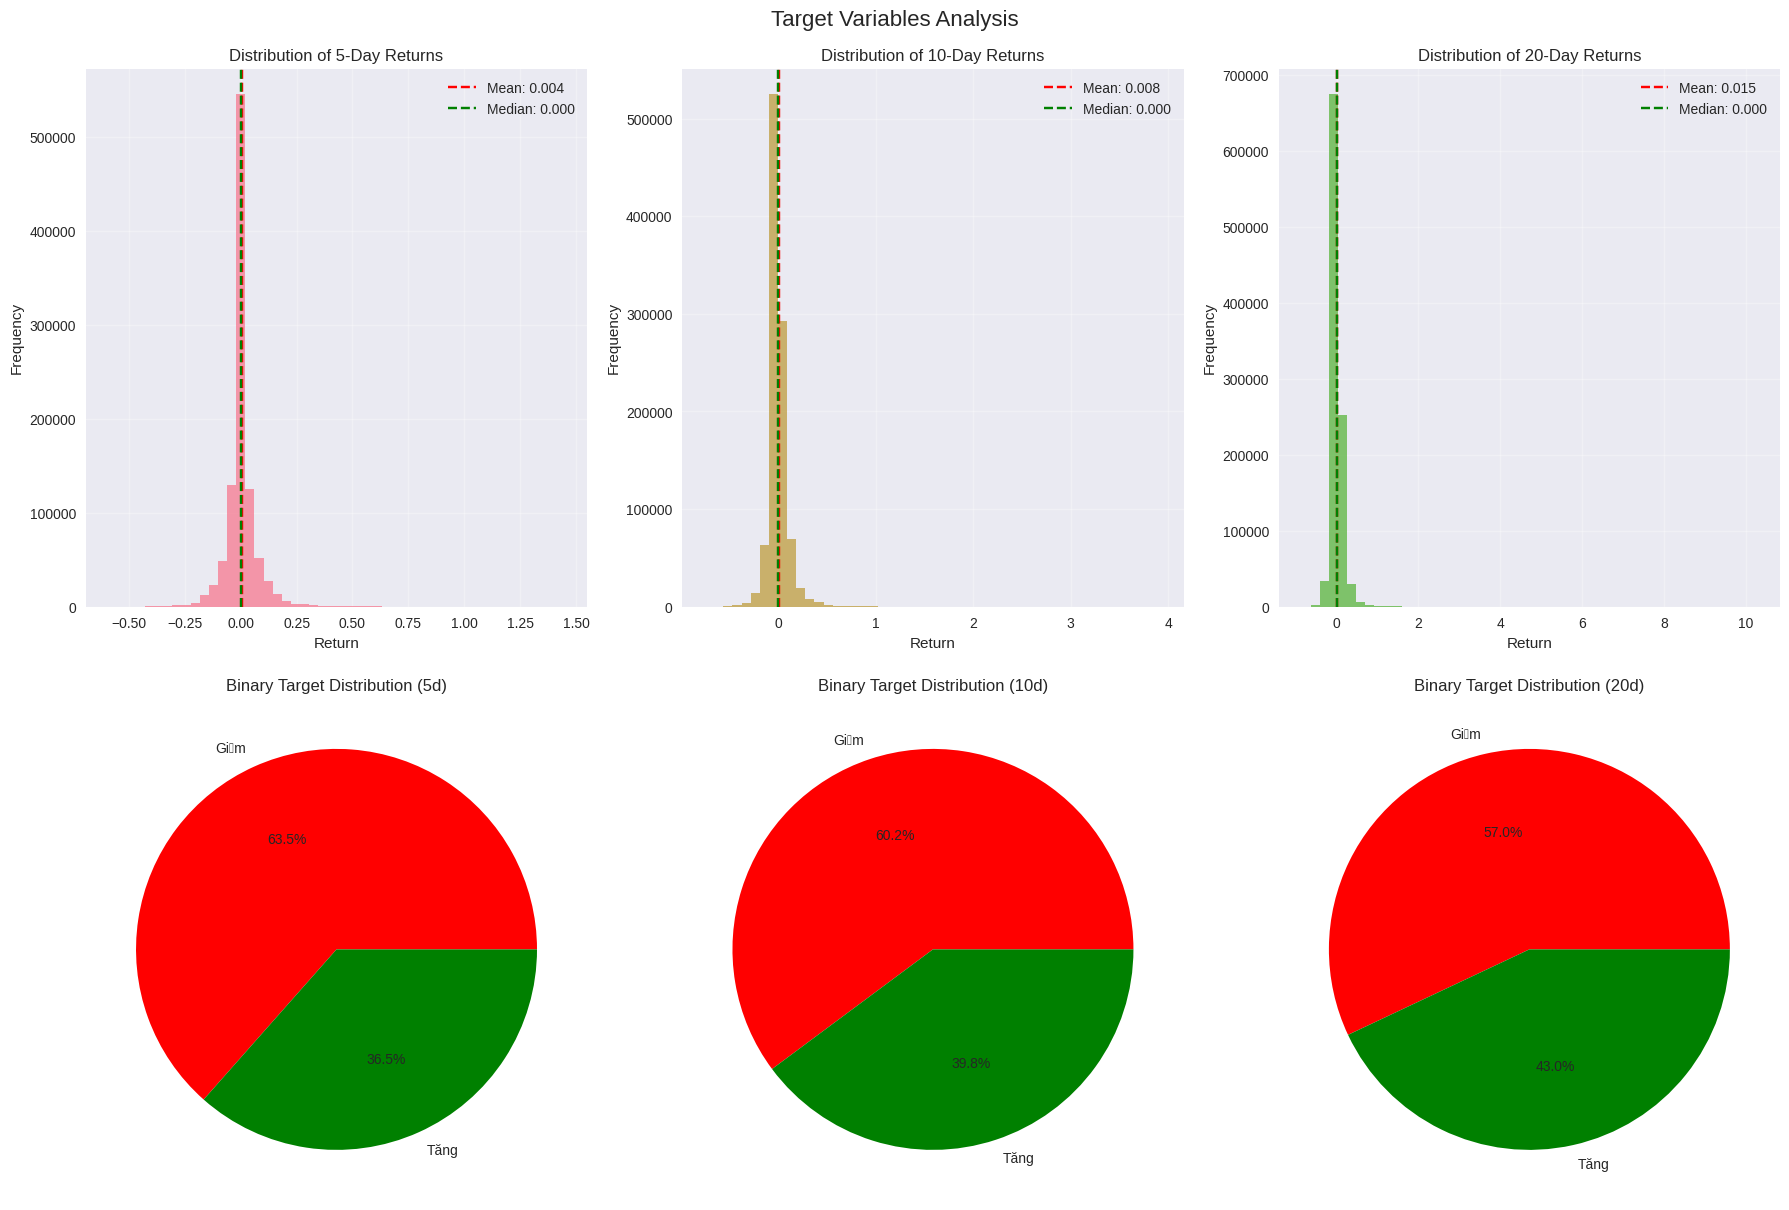

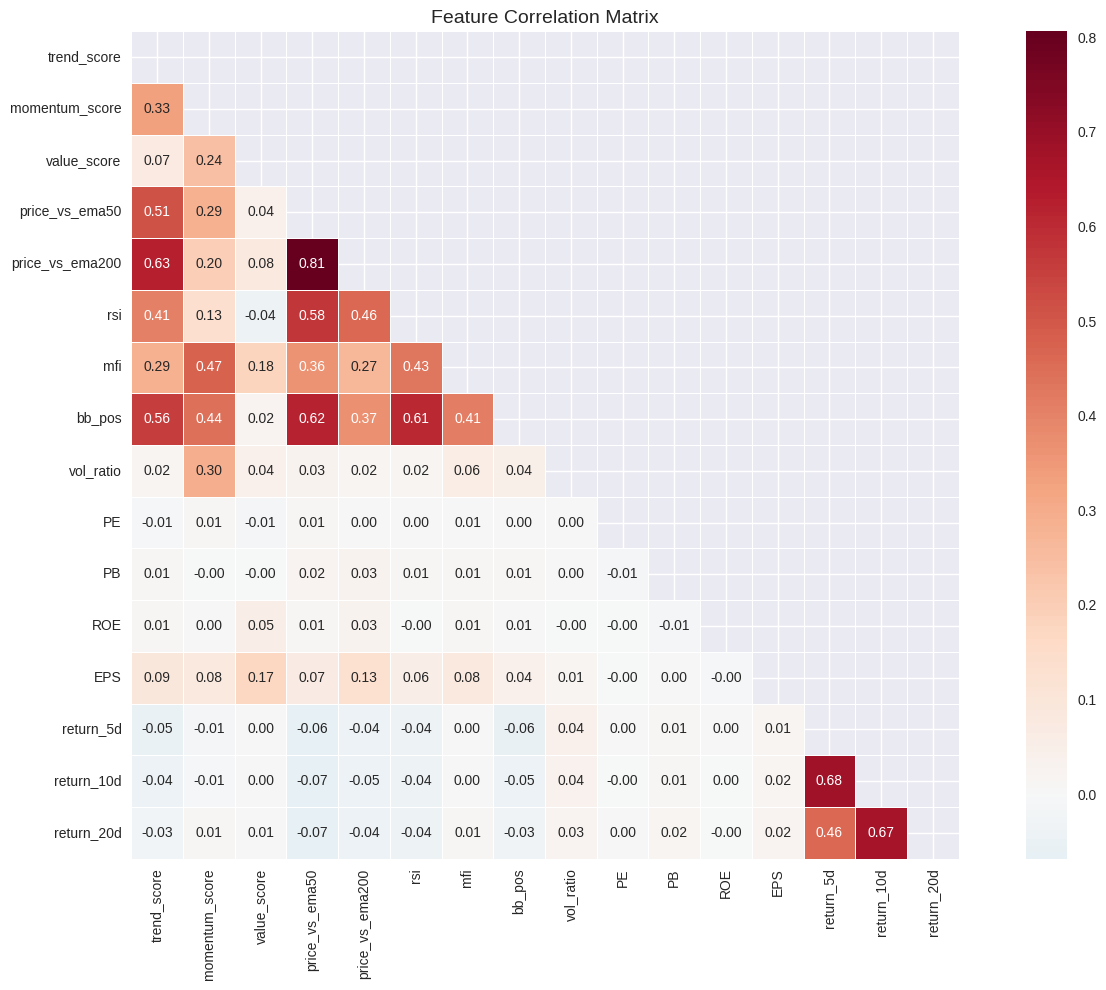

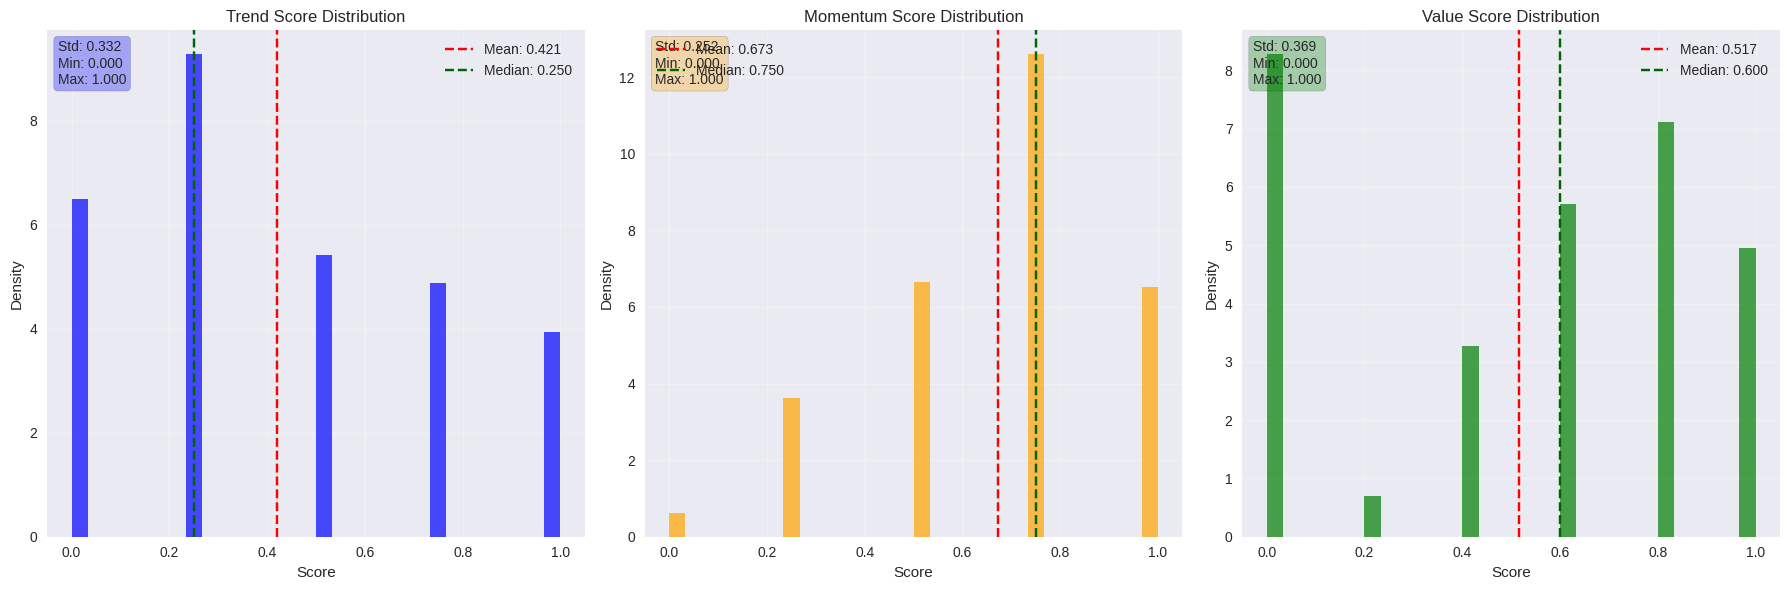

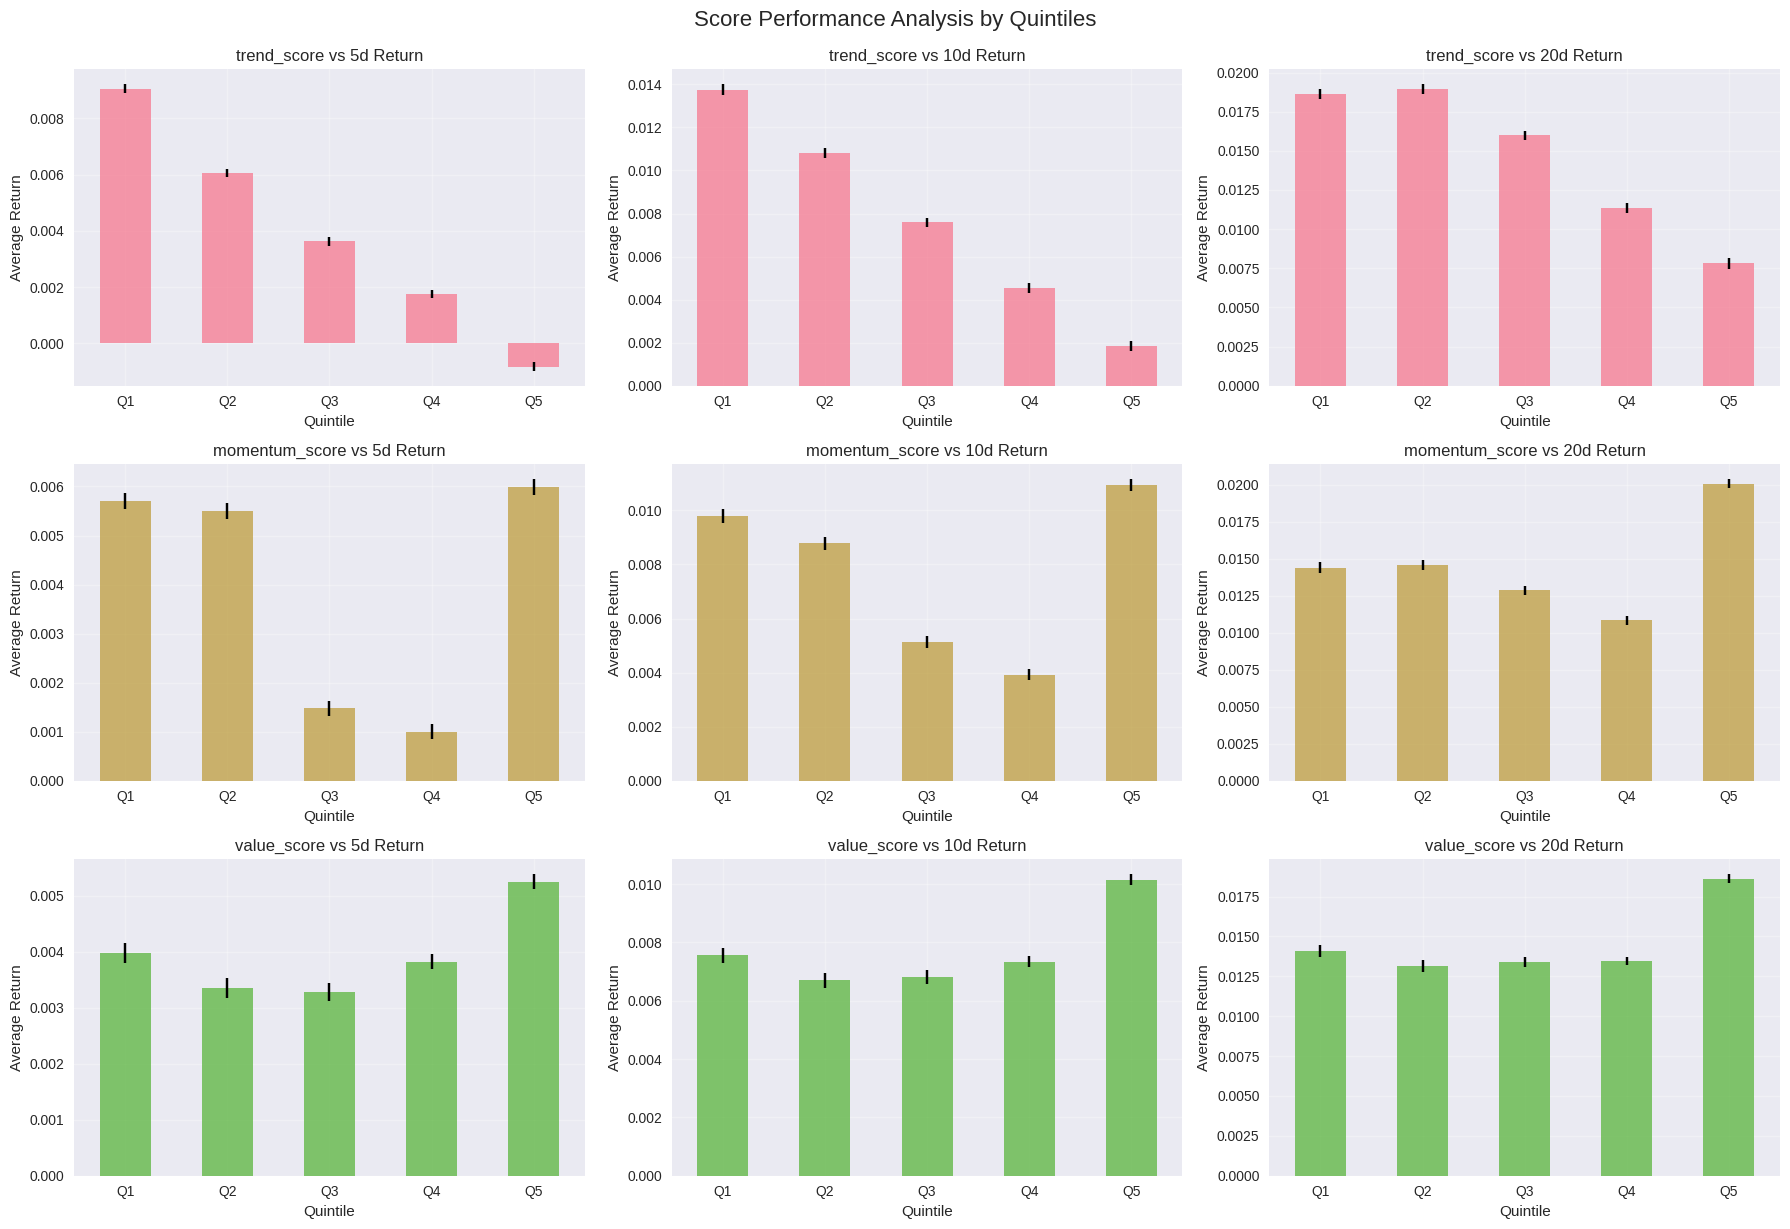

✅ Hoàn thành EDA!


In [12]:
# CELL 2: EXPLORATORY DATA ANALYSIS & VISUALIZATION

def plot_target_distribution(data):
    """
    Phân tích phân phối target variables
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    # Return distribution
    for i, period in enumerate([5, 10, 20]):
        ax = axes[0, i]
        returns = data[f'return_{period}d'].dropna()

        ax.hist(returns, bins=50, alpha=0.7, color=f'C{i}')
        ax.axvline(returns.mean(), color='red', linestyle='--',
                  label=f'Mean: {returns.mean():.3f}')
        ax.axvline(returns.median(), color='green', linestyle='--',
                  label=f'Median: {returns.median():.3f}')

        ax.set_title(f'Distribution of {period}-Day Returns')
        ax.set_xlabel('Return')
        ax.set_ylabel('Frequency')
        ax.legend()
        ax.grid(True, alpha=0.3)

    # Binary target distribution
    for i, period in enumerate([5, 10, 20]):
        ax = axes[1, i]
        target_counts = data[f'target_binary_{period}d'].value_counts()

        ax.pie(target_counts.values, labels=['Giảm', 'Tăng'], autopct='%1.1f%%',
               colors=['red', 'green'])
        ax.set_title(f'Binary Target Distribution ({period}d)')

    plt.tight_layout()
    plt.suptitle('Target Variables Analysis', fontsize=16, y=1.02)
    plt.show()

def plot_feature_correlation(data):
    """
    Phân tích correlation giữa các features
    """
    # Chọn các features chính
    feature_cols = ['trend_score', 'momentum_score', 'value_score',
                   'price_vs_ema50', 'price_vs_ema200', 'rsi', 'mfi',
                   'bb_pos', 'vol_ratio', 'PE', 'PB', 'ROE', 'EPS']

    target_cols = ['return_5d', 'return_10d', 'return_20d']

    corr_data = data[feature_cols + target_cols].corr()

    fig, ax = plt.subplots(figsize=(14, 10))
    mask = np.triu(np.ones_like(corr_data, dtype=bool))

    sns.heatmap(corr_data, mask=mask, annot=True, fmt='.2f',
                cmap='RdBu_r', center=0, ax=ax,
                square=True, linewidths=0.5)

    ax.set_title('Feature Correlation Matrix', fontsize=14)
    plt.tight_layout()
    plt.show()

def plot_scores_distribution(data):
    """
    Phân tích phân phối các composite scores
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    scores = ['trend_score', 'momentum_score', 'value_score']
    colors = ['blue', 'orange', 'green']

    for i, (score, color) in enumerate(zip(scores, colors)):
        ax = axes[i]

        # Distribution
        ax.hist(data[score], bins=30, alpha=0.7, color=color, density=True)

        # Statistics
        mean_val = data[score].mean()
        median_val = data[score].median()
        std_val = data[score].std()

        ax.axvline(mean_val, color='red', linestyle='--',
                  label=f'Mean: {mean_val:.3f}')
        ax.axvline(median_val, color='darkgreen', linestyle='--',
                  label=f'Median: {median_val:.3f}')

        ax.set_title(f'{score.replace("_", " ").title()} Distribution')
        ax.set_xlabel('Score')
        ax.set_ylabel('Density')
        ax.legend()
        ax.grid(True, alpha=0.3)

        # Add text box with statistics
        textstr = f'Std: {std_val:.3f}\nMin: {data[score].min():.3f}\nMax: {data[score].max():.3f}'
        props = dict(boxstyle='round', facecolor=color, alpha=0.3)
        ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
                verticalalignment='top', bbox=props)

    plt.tight_layout()
    plt.show()

def analyze_score_performance(data):
    """
    Phân tích hiệu suất của các scores
    """
    scores = ['trend_score', 'momentum_score', 'value_score']
    periods = [5, 10, 20]

    fig, axes = plt.subplots(len(scores), len(periods), figsize=(18, 12))

    for i, score in enumerate(scores):
        for j, period in enumerate(periods):
            ax = axes[i, j]

            # Chia thành quintiles
            data['score_quintile'] = pd.qcut(data[score].rank(method='first'), 5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])

            # Tính average return by quintile
            quintile_returns = data.groupby('score_quintile')[f'return_{period}d'].agg(['mean', 'std', 'count'])

            # Plot
            quintile_returns['mean'].plot(kind='bar', ax=ax, color=f'C{i}', alpha=0.7)
            ax.set_title(f'{score} vs {period}d Return')
            ax.set_xlabel('Quintile')
            ax.set_ylabel('Average Return')
            ax.tick_params(axis='x', rotation=0)
            ax.grid(True, alpha=0.3)

            # Add error bars
            ax.errorbar(range(len(quintile_returns)), quintile_returns['mean'],
                       yerr=quintile_returns['std']/np.sqrt(quintile_returns['count']),
                       fmt='none', ecolor='black', capsize=3)

    plt.tight_layout()
    plt.suptitle('Score Performance Analysis by Quintiles', fontsize=16, y=1.02)
    plt.show()

def summary_statistics(data):
    """
    Tóm tắt thống kê dữ liệu
    """
    print("=== SUMMARY STATISTICS ===")
    print(f"📊 Total observations: {len(data):,}")
    print(f"🏢 Number of tickers: {data['ticker'].nunique()}")
    print(f"📅 Date range: {data['timestamp'].min()} to {data['timestamp'].max()}")

    print("\n📈 Return Statistics:")
    for period in [5, 10, 20]:
        returns = data[f'return_{period}d']
        print(f"  {period}d returns - Mean: {returns.mean():.4f}, Std: {returns.std():.4f}")

        positive_rate = (returns > 0).mean()
        print(f"  {period}d positive rate: {positive_rate:.2%}")

    print("\n🎯 Score Statistics:")
    for score in ['trend_score', 'momentum_score', 'value_score']:
        score_data = data[score]
        print(f"  {score}: Mean={score_data.mean():.3f}, Std={score_data.std():.3f}")

    print("\n📊 Data Quality:")
    total_missing = data.isnull().sum().sum()
    print(f"  Total missing values: {total_missing:,}")
    print(f"  Missing rate: {total_missing/(len(data)*data.shape[1]):.2%}")

# Main EDA function
def perform_eda(data):
    """
    Thực hiện toàn bộ Exploratory Data Analysis
    """
    print("🔍 Bắt đầu Exploratory Data Analysis...")

    summary_statistics(data)
    plot_target_distribution(data)
    plot_feature_correlation(data)
    plot_scores_distribution(data)
    analyze_score_performance(data)

    print("✅ Hoàn thành EDA!")

perform_eda(df_filtered)

In [13]:
# ENHANCED QUANTITATIVE ML PIPELINE WITH XGBOOST AND SHAP

# ML imports
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, TimeSeriesSplit
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    mean_squared_error, mean_absolute_error, r2_score
)

# SHAP for model interpretability
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class QuantitativeMLPipeline:
    """
    Enhanced Pipeline Machine Learning cho chiến lược đầu tư định lượng
    Chỉ sử dụng XGBoost với hyperparameter tuning và SHAP analysis
    """

    def __init__(self, target_period=10, problem_type='classification',
                 tuning='grid', n_iter=50, cv_folds=5, random_state=42,
                 top_n_candidates=3):
        """
        Parameters:
        -----------
        target_period : int
            Khoảng thời gian dự báo (5, 10, 20 ngày)
        problem_type : str
            Loại bài toán ('classification', 'regression')
        tuning : str
            Loại hyperparameter tuning ('grid', 'random', 'none', 'two_stage')
        n_iter : int
            Số iteration cho RandomizedSearchCV
        cv_folds : int
            Số folds cho cross-validation
        random_state : int
            Random seed
        top_n_candidates : int
            Số lượng top candidates từ RandomizedSearch để dùng cho GridSearch
        """
        self.target_period = target_period
        self.problem_type = problem_type
        self.tuning = tuning
        self.n_iter = n_iter
        self.cv_folds = cv_folds
        self.random_state = random_state
        self.top_n_candidates = top_n_candidates

        # Model components
        self.model = None
        self.best_model = None
        self.grid_search = None
        self.scaler = None
        self.feature_importance_ = None
        self.shap_explainer = None
        self.shap_values = None

        # Parameters for tuning
        self.param_grid = None
        self.param_distributions = None

        # Two-stage tuning components
        self.random_search = None
        self.grid_search_refined = None
        self.random_search_results = None

        # Default base parameters
        self.base_params = self._get_default_params()

        print(f"✅ Initialized XGBoost Pipeline:")
        print(f"   📊 Problem Type: {problem_type}")
        print(f"   🎯 Target Period: {target_period} days")
        print(f"   🔧 Tuning Method: {tuning}")
        if tuning == 'random':
            print(f"   🎲 Random Iterations: {n_iter}")
        elif tuning == 'two_stage':
            print(f"   🎲 Random Iterations: {n_iter}")
            print(f"   🎯 Top Candidates for GridSearch: {top_n_candidates}")
        print(f"   📋 CV Folds: {cv_folds}")

    def _get_default_params(self):
        """Trả về default parameters cho XGBoost"""
        if self.problem_type == 'classification':
            return {
                'objective': 'binary:logistic',
                'eval_metric': 'auc',
                'max_depth': 6,
                'learning_rate': 0.1,
                'n_estimators': 200,
                'subsample': 0.8,
                'colsample_bytree': 0.8,
                'random_state': self.random_state,
                'verbosity': 0
            }
        else:  # regression
            return {
                'objective': 'reg:squarederror',
                'eval_metric': 'rmse',
                'max_depth': 6,
                'learning_rate': 0.1,
                'n_estimators': 200,
                'subsample': 0.8,
                'colsample_bytree': 0.8,
                'random_state': self.random_state,
                'verbosity': 0
            }

    def set_param_grid(self, param_grid):
        """
        Thiết lập param_grid cho GridSearchCV

        Example:
        --------
        pipeline.set_param_grid({
            "max_depth": [3, 5, 7],
            "learning_rate": [0.01, 0.05, 0.1],
            "n_estimators": [100, 200]
        })
        """
        self.param_grid = param_grid
        print(f"📋 Đã thiết lập param_grid với {len(param_grid)} parameters:")
        for param, values in param_grid.items():
            print(f"   {param}: {values}")

    def set_param_distributions(self, param_distributions):
        """
        Thiết lập param_distributions cho RandomizedSearchCV

        Example:
        --------
        pipeline.set_param_distributions({
            "max_depth": [3, 5, 7, 9],
            "learning_rate": np.linspace(0.01, 0.3, 10),
            "n_estimators": [100, 200, 300, 500]
        })
        """
        self.param_distributions = param_distributions
        print(f"📋 Đã thiết lập param_distributions với {len(param_distributions)} parameters:")
        for param, values in param_distributions.items():
            if isinstance(values, (list, np.ndarray)) and len(values) > 5:
                print(f"   {param}: {type(values).__name__} with {len(values)} values")
            else:
                print(f"   {param}: {values}")

    def set_top_n_candidates(self, top_n):
        """
        Thiết lập số lượng top candidates cho two-stage tuning
        """
        self.top_n_candidates = top_n
        print(f"🎯 Đã thiết lập top_n_candidates = {top_n}")

    def prepare_features(self, data):
        """
        Chuẩn bị features cho mô hình
        """
        # Định nghĩa features
        trend_features = [
            'price_vs_ema50', 'price_vs_ema200', 'ema_ratio',
            'macd_signal_strength', 'macd_trend', 'trend_score'
        ]

        momentum_features = [
            'rsi', 'mfi', 'bb_pos', 'vol_ratio',
            'rsi_overbought', 'rsi_oversold', 'mfi_momentum',
            'volume_momentum', 'momentum_score'
        ]

        value_features = [
            'PE', 'PB', 'ROE', 'EPS', 'RevenueGrowth', 'ProfitGrowth',
            'pe_normalized',
            'pb_normalized',
            'growth_score',
            'roe_quality', 'value_score'
        ]

        # Kết hợp tất cả features
        self.feature_columns = trend_features + momentum_features + value_features
        self.trend_features = trend_features
        self.momentum_features = momentum_features
        self.value_features = value_features

        # Lấy features và target
        X = data[self.feature_columns].copy()

        if self.problem_type == 'classification':
            y = data[f'target_binary_{self.target_period}d'].copy()
        else:
            y = data[f'return_{self.target_period}d'].copy()

        # Xử lý missing values
        # X = X.fillna(X.median())

        print(f"📊 Prepared features:")
        print(f"   📈 Trend: {len(trend_features)} features")
        print(f"   🚀 Momentum: {len(momentum_features)} features")
        print(f"   💰 Value: {len(value_features)} features")
        print(f"   📋 Total: {len(self.feature_columns)} features")

        return X, y

    def create_model(self):
        """
        Tạo XGBoost model
        """
        if self.problem_type == 'classification':
            self.model = xgb.XGBClassifier(**self.base_params)
        else:
            self.model = xgb.XGBRegressor(**self.base_params)

        print(f"✅ Created XGBoost {self.problem_type} model")
        return self.model

    def _create_refined_param_grid(self, top_candidates, max_values_per_param=2):
        """
        Tạo param_grid từ top candidates cho GridSearch refinement
        """
        refined_grid = {}

        for param in self.param_distributions.keys():
            param_values = set()

            # Lấy các giá trị từ top candidates
            for candidate in top_candidates:
                if param in candidate:
                    param_values.add(candidate[param])

            # Nếu param là numeric, thêm các giá trị lân cận
            param_list = list(param_values)
            if param_list and isinstance(param_list[0], (int, float)):
                expanded_values = set(param_values)

                for value in param_values:
                    if isinstance(value, int):
                        # Thêm ±1 cho integer parameters
                        if param in ['max_depth', 'n_estimators']:
                            if param == 'max_depth':
                                expanded_values.update([max(1, value-1), value+1])
                            elif param == 'n_estimators':
                                expanded_values.update([max(50, value-50), value+50])
                    elif isinstance(value, float):
                        # Thêm ±50% cho float parameters
                        delta = value * 0.2
                        expanded_values.update([
                            max(0.001, value - delta),
                            min(1.0, value + delta)
                        ])

                #refined_grid[param] = sorted(list(expanded_values))
                refined_grid[param] = sorted(list(expanded_values))[:max_values_per_param]
            else:
                # Cho categorical parameters, chỉ giữ nguyên
                #refined_grid[param] = param_list
                refined_grid[param] = param_list[:max_values_per_param]

        return refined_grid

    def _perform_two_stage_tuning(self, X_train, y_train):
        """
        Thực hiện hyperparameter tuning 2 bước:
        1. RandomizedSearchCV để tìm vùng tham số tốt
        2. GridSearchCV trong vùng hẹp từ kết quả RandomizedSearch
        """
        if self.param_distributions is None:
            raise ValueError("param_distributions chưa được thiết lập. Hãy gọi set_param_distributions() trước.")

        print(f"\n🔍 BƯỚC 1: RandomizedSearch - Tìm vùng tham số tốt...")
        print(f"   🎲 Iterations: {self.n_iter}")
        print(f"   🎯 Sẽ lấy top {self.top_n_candidates} candidates")

        # Tạo TimeSeriesSplit cho cross-validation
        tscv = TimeSeriesSplit(n_splits=self.cv_folds)
        scoring = 'roc_auc' if self.problem_type == 'classification' else 'neg_mean_squared_error'

        # Bước 1: RandomizedSearchCV
        self.random_search = RandomizedSearchCV(
            estimator=self.model,
            param_distributions=self.param_distributions,
            n_iter=self.n_iter,
            cv=tscv,
            scoring=scoring,
            n_jobs=-1,
            verbose=1,
            random_state=self.random_state
        )

        self.random_search.fit(X_train, y_train)

        # Lưu kết quả RandomizedSearch
        self.random_search_results = pd.DataFrame(self.random_search.cv_results_)

        print(f"✅ RandomizedSearch completed!")
        print(f"   🎯 Best Random Score: {self.random_search.best_score_:.4f}")

        # Lấy top candidates
        top_results = self.random_search_results.nlargest(self.top_n_candidates, 'mean_test_score')
        top_candidates = []

        for idx, row in top_results.iterrows():
            candidate = {}
            for param in self.param_distributions.keys():
                param_key = f'param_{param}'
                if param_key in row:
                    candidate[param] = row[param_key]
            top_candidates.append(candidate)

        print(f"\n🎯 Top {len(top_candidates)} candidates từ RandomizedSearch:")
        for i, candidate in enumerate(top_candidates, 1):
            score = top_results.iloc[i-1]['mean_test_score']
            print(f"   #{i}: Score={score:.4f}, Params={candidate}")

        # Bước 2: Tạo refined param_grid
        print(f"\n🔍 BƯỚC 2: GridSearch Refinement - Tinh chỉnh trong vùng hẹp...")
        refined_param_grid = self._create_refined_param_grid(top_candidates)
        total_combinations = 1
        for param, values in refined_param_grid.items():
            print(f"   {param}: {values} ({len(values)} values)")
            total_combinations *= len(values)
        print(f"   📊 Total combinations: {total_combinations}")

        # GridSearchCV với refined parameters
        self.grid_search_refined = GridSearchCV(
            estimator=self.model,
            param_grid=refined_param_grid,
            cv=tscv,
            scoring=scoring,
            n_jobs=-1,
            verbose=1
        )

        self.grid_search_refined.fit(X_train, y_train)

        # Lưu best model từ GridSearch refinement
        self.best_model = self.grid_search_refined.best_estimator_
        self.grid_search = self.grid_search_refined  # Để compatibility với code cũ

        print(f"\n✅ Two-stage tuning completed!")
        print(f"🎯 Final Best Score: {self.grid_search_refined.best_score_:.4f}")
        print(f"📈 Improvement: {self.grid_search_refined.best_score_ - self.random_search.best_score_:.4f}")
        print(f"🔧 Final Best Params:")
        for param, value in self.grid_search_refined.best_params_.items():
            print(f"   {param}: {value}")


    def _perform_hyperparameter_tuning(self, X_train, y_train):
        """
        Thực hiện hyperparameter tuning
        """
        print(f"\n🔧 Starting hyperparameter tuning ({self.tuning})...")

        # Tạo TimeSeriesSplit cho cross-validation
        tscv = TimeSeriesSplit(n_splits=self.cv_folds)

        # Scoring metric
        scoring = 'roc_auc' if self.problem_type == 'classification' else 'neg_mean_squared_error'

        if self.tuning == 'grid':
            if self.param_grid is None:
                raise ValueError("param_grid chưa được thiết lập. Hãy gọi set_param_grid() trước.")

            self.grid_search = GridSearchCV(
                estimator=self.model,
                param_grid=self.param_grid,
                cv=tscv,
                scoring=scoring,
                n_jobs=-1,
                verbose=1
            )

        elif self.tuning == 'random':
            if self.param_distributions is None:
                raise ValueError("param_distributions chưa được thiết lập. Hãy gọi set_param_distributions() trước.")

            self.grid_search = RandomizedSearchCV(
                estimator=self.model,
                param_distributions=self.param_distributions,
                n_iter=self.n_iter,
                cv=tscv,
                scoring=scoring,
                n_jobs=-1,
                verbose=1,
                random_state=self.random_state
            )

        elif self.tuning == 'two_stage':
            # Gọi two-stage tuning method
            self._perform_two_stage_tuning(X_train, y_train)
            return  # Early return vì two-stage đã hoàn thành

        # Fit grid search cho 'grid' và 'random' modes
        self.grid_search.fit(X_train, y_train)

        # Lưu best model
        self.best_model = self.grid_search.best_estimator_

        print(f"\n✅ Hyperparameter tuning completed!")
        print(f"🎯 Best Score: {self.grid_search.best_score_:.4f}")
        print(f"🔧 Best Params:")
        for param, value in self.grid_search.best_params_.items():
            print(f"   {param}: {value}")

    def train_model(self, X_train, y_train, X_val=None, y_val=None):
        """
        Huấn luyện mô hình với hyperparameter tuning
        """
        print(f"\n🚀 Training XGBoost {self.problem_type} model...")

        # Chuẩn hóa dữ liệu
        self.scaler = RobustScaler()
        X_train_scaled = self.scaler.fit_transform(X_train)

        if X_val is not None:
            X_val_scaled = self.scaler.transform(X_val)

        # Hyperparameter tuning nếu được yêu cầu
        if self.tuning != 'none':
            self._perform_hyperparameter_tuning(X_train_scaled, y_train)
            # Sử dụng best model
            final_model = self.best_model
        else:
            # Sử dụng model với default params
            final_model = self.model
            final_model.fit(X_train_scaled, y_train)

        # Lưu final model
        self.model = final_model

        # Tính feature importance
        if hasattr(self.model, 'feature_importances_'):
            self.feature_importance_ = pd.DataFrame({
                'feature': self.feature_columns,
                'importance': self.model.feature_importances_
            }).sort_values('importance', ascending=False)

        # Khởi tạo SHAP explainer
        try:
            self.shap_explainer = shap.TreeExplainer(self.model)
            print("📊 SHAP explainer initialized successfully")
        except Exception as e:
            print(f"⚠️ Could not initialize SHAP explainer: {e}")

        print("✅ Model training completed!")

    def predict(self, X):
        """
        Dự báo với model đã train
        """
        X_scaled = self.scaler.transform(X)

        if self.problem_type == 'classification':
            predictions = self.model.predict_proba(X_scaled)[:, 1]
        else:
            predictions = self.model.predict(X_scaled)

        return predictions

    def get_feature_weights(self):
        """
        Tính toán trọng số cho từng nhóm features
        """
        if self.feature_importance_ is None:
            print("⚠️ Feature importance chưa được tính. Hãy train model trước!")
            return None

        # Tính tổng importance theo nhóm
        trend_importance = self.feature_importance_[
            self.feature_importance_['feature'].isin(self.trend_features)
        ]['importance'].sum()

        momentum_importance = self.feature_importance_[
            self.feature_importance_['feature'].isin(self.momentum_features)
        ]['importance'].sum()

        value_importance = self.feature_importance_[
            self.feature_importance_['feature'].isin(self.value_features)
        ]['importance'].sum()

        # Chuẩn hóa thành tỷ lệ phần trăm
        total_importance = trend_importance + momentum_importance + value_importance

        weights = {
            'trend': trend_importance / total_importance,
            'momentum': momentum_importance / total_importance,
            'value': value_importance / total_importance
        }

        print("🎯 Feature Group Weights:")
        print(f"  📈 Trend: {weights['trend']:.1%}")
        print(f"  🚀 Momentum: {weights['momentum']:.1%}")
        print(f"  💰 Value: {weights['value']:.1%}")

        return weights

    def show_feature_importance(self, top_n=20):
        """
        Hiển thị feature importance
        """
        if self.feature_importance_ is None:
            print("⚠️ Feature importance chưa được tính!")
            return

        fig, axes = plt.subplots(1, 2, figsize=(20, 8))

        # Top features
        top_features = self.feature_importance_.head(top_n)

        # Bar plot
        ax1 = axes[0]
        colors = []
        for feature in top_features['feature']:
            if feature in self.trend_features:
                colors.append('blue')
            elif feature in self.momentum_features:
                colors.append('orange')
            elif feature in self.value_features:
                colors.append('green')
            else:
                colors.append('gray')

        bars = ax1.barh(range(len(top_features)), top_features['importance'], color=colors)
        ax1.set_yticks(range(len(top_features)))
        ax1.set_yticklabels(top_features['feature'])
        ax1.set_xlabel('Feature Importance')
        ax1.set_title(f'Top {top_n} Feature Importance (XGBoost)')
        ax1.grid(True, alpha=0.3)

        # Legend
        import matplotlib.patches as mpatches
        trend_patch = mpatches.Patch(color='blue', label='Trend')
        momentum_patch = mpatches.Patch(color='orange', label='Momentum')
        value_patch = mpatches.Patch(color='green', label='Value')
        ax1.legend(handles=[trend_patch, momentum_patch, value_patch])

        # Group weights pie chart
        weights = self.get_feature_weights()
        if weights:
            ax2 = axes[1]
            colors_pie = ['blue', 'orange', 'green']
            wedges, texts, autotexts = ax2.pie(
                weights.values(),
                labels=[k.capitalize() for k in weights.keys()],
                autopct='%1.1f%%',
                colors=colors_pie,
                startangle=90
            )
            ax2.set_title('Feature Group Importance')

        plt.tight_layout()
        plt.show()

    def compute_shap_values(self, X, sample_size=1000):
        """
        Tính SHAP values cho dataset
        """
        if self.shap_explainer is None:
            print("⚠️ SHAP explainer chưa được khởi tạo!")
            return None

        # Chuẩn hóa data
        X_scaled = self.scaler.transform(X)

        # Sample data nếu quá lớn
        if len(X_scaled) > sample_size:
            indices = np.random.choice(len(X_scaled), sample_size, replace=False)
            X_sample = X_scaled[indices]
            print(f"📊 Sampling {sample_size} points from {len(X_scaled)} total points")
        else:
            X_sample = X_scaled

        # Tính SHAP values
        print("🔍 Computing SHAP values...")
        try:
            self.shap_values = self.shap_explainer.shap_values(X_sample)
            print("✅ SHAP values computed successfully!")
            return self.shap_values, X_sample
        except Exception as e:
            print(f"❌ Error computing SHAP values: {e}")
            return None, None

    def show_shap_analysis(self, X, max_display=20, sample_size=1000):
        """
        Hiển thị phân tích SHAP
        """
        shap_values, X_sample = self.compute_shap_values(X, sample_size)

        if shap_values is None:
            return

        # Tạo DataFrame với feature names
        X_sample_df = pd.DataFrame(X_sample, columns=self.feature_columns)

        fig, axes = plt.subplots(2, 2, figsize=(20, 20))

        # 1. Summary plot (bar)
        plt.subplot(2, 2, 1)
        shap.summary_plot(shap_values, X_sample_df, plot_type="bar",
                         max_display=max_display, show=False)
        plt.title('SHAP Feature Importance')

        # 2. Summary plot (beeswarm)
        plt.subplot(2, 2, 2)
        shap.summary_plot(shap_values, X_sample_df,
                         max_display=max_display, show=False)
        plt.title('SHAP Summary (Beeswarm)')

        # 3. Top features by mean absolute SHAP
        plt.subplot(2, 2, 3)
        feature_importance = np.mean(np.abs(shap_values), axis=0)
        top_indices = np.argsort(feature_importance)[-max_display:]
        top_features = [self.feature_columns[i] for i in top_indices]
        top_importance = feature_importance[top_indices]

        colors = []
        for feature in top_features:
            if feature in self.trend_features:
                colors.append('blue')
            elif feature in self.momentum_features:
                colors.append('orange')
            elif feature in self.value_features:
                colors.append('green')
            else:
                colors.append('gray')

        plt.barh(range(len(top_features)), top_importance, color=colors)
        plt.yticks(range(len(top_features)), top_features)
        plt.xlabel('Mean |SHAP value|')
        plt.title('Top Features by Mean Absolute SHAP Value')
        plt.grid(True, alpha=0.3)


        # 4. SHAP values distribution
        plt.subplot(2, 2, 4)
        shap_flat = shap_values.flatten()
        plt.hist(shap_flat, bins=50, alpha=0.7, edgecolor='black')
        plt.xlabel('SHAP Values')
        plt.ylabel('Frequency')
        plt.title('Distribution of SHAP Values')
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # In thống kê
        print("\n📊 SHAP Analysis Summary:")
        print(f"   🔍 Sample size: {len(X_sample):,}")
        print(f"   📋 Features analyzed: {len(self.feature_columns)}")
        print(f"   📈 Top {len(top_features)} features displayed")
        print(f"   🎯 Mean absolute SHAP: {np.mean(np.abs(shap_values)):.4f}")

    def get_tuning_results(self):
        """
        Trả về kết quả chi tiết của hyperparameter tuning
        """
        results = {}

        if self.tuning == 'two_stage':
            results['tuning_method'] = 'two_stage'
            results['random_search_best_score'] = self.random_search.best_score_ if self.random_search else None
            results['grid_search_best_score'] = self.grid_search_refined.best_score_ if self.grid_search_refined else None
            #results['improvement'] = (results['grid_search_best_score'] - results['random_search_best_score']) if both_exist else None
            results['improvement'] = (
                (results['grid_search_best_score'] - results['random_search_best_score'])
                if (self.random_search and self.grid_search_refined)
                else None
            )
            results['random_search_results'] = self.random_search_results
            results['top_n_candidates'] = self.top_n_candidates

        elif self.grid_search:
            results['tuning_method'] = self.tuning
            results['best_score'] = self.grid_search.best_score_
            results['best_params'] = self.grid_search.best_params_
            results['cv_results'] = pd.DataFrame(self.grid_search.cv_results_)

        return results

    def get_model_info(self):
        """
        Trả về thông tin chi tiết về model
        """
        info = {
            'model_type': 'XGBoost',
            'problem_type': self.problem_type,
            'target_period': self.target_period,
            'tuning_method': self.tuning,
            'n_features': len(self.feature_columns) if hasattr(self, 'feature_columns') else None,
            'model_params': self.model.get_params() if self.model else None
        }

        if self.tuning == 'two_stage':
            info['top_n_candidates'] = self.top_n_candidates
            if self.random_search:
                info['random_search_best_score'] = self.random_search.best_score_
            if self.grid_search_refined:
                info['grid_search_best_score'] = self.grid_search_refined.best_score_
                info['final_best_params'] = self.grid_search_refined.best_params_
        elif self.grid_search:
            info['best_score'] = self.grid_search.best_score_
            info['best_params'] = self.grid_search.best_params_

        return info

In [14]:

import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def time_series_split_data(data, test_size=0.2, val_size=0.1):
    """
    Chia dữ liệu theo thời gian để tránh data leakage
    """
    print("📅 Chia dữ liệu theo thời gian...")

    # Sắp xếp theo thời gian
    data_sorted = data.sort_values('timestamp').reset_index(drop=True)

    n = len(data_sorted)
    train_end = int(n * (1 - test_size - val_size))
    val_end = int(n * (1 - test_size))

    train_data = data_sorted[:train_end].copy()
    val_data = data_sorted[train_end:val_end].copy()
    test_data = data_sorted[val_end:].copy()

    print(f"📊 Training: {len(train_data):,} ({len(train_data)/n:.1%})")
    print(f"📊 Validation: {len(val_data):,} ({len(val_data)/n:.1%})")
    print(f"📊 Test: {len(test_data):,} ({len(test_data)/n:.1%})")

    print(f"📅 Train period: {train_data['timestamp'].min()} to {train_data['timestamp'].max()}")
    print(f"📅 Val period: {val_data['timestamp'].min()} to {val_data['timestamp'].max()}")
    print(f"📅 Test period: {test_data['timestamp'].min()} to {test_data['timestamp'].max()}")

    return train_data, val_data, test_data

def setup_two_stage_parameters(pipeline, param_config='comprehensive'):
    """
    Thiết lập parameters cho Two-Stage Tuning với các cấu hình khác nhau

    Parameters:
    -----------
    pipeline : QuantitativeMLPipeline
        Pipeline instance
    param_config : str
        'comprehensive', 'balanced', 'quick'
    """

    if param_config == 'comprehensive':
        # Comprehensive search - nhiều tham số, thời gian lâu nhưng kết quả tốt
        param_distributions = {
            'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
            'learning_rate': np.linspace(0.01, 0.3, 30),
            'n_estimators': [100, 150, 200, 300, 400, 500, 600, 800, 1000],
            'subsample': np.linspace(0.6, 1.0, 15),
            'colsample_bytree': np.linspace(0.6, 1.0, 15),
            'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
            'min_child_weight': [1, 3, 5, 7, 9],
            'reg_alpha': [0, 0.001, 0.01, 0.1, 0.5, 1.0],
            'reg_lambda': [1, 1.5, 2.0, 2.5, 3.0]
        }
        n_iter = 200
        top_n = 5

    elif param_config == 'balanced':
        # Balanced search - cân bằng giữa thời gian và hiệu quả
        param_distributions = {
            'max_depth': [3, 4, 5, 6, 7, 8, 9],
            'learning_rate': np.linspace(0.01, 0.25, 20),
            'n_estimators': [100, 200, 300, 500, 800],
            'subsample': np.linspace(0.7, 1.0, 10),
            'colsample_bytree': np.linspace(0.7, 1.0, 10),
            'gamma': [0, 0.1, 0.2, 0.3],
            'min_child_weight': [1, 3, 5],
            'reg_alpha': [0, 0.01, 0.1, 0.5],
            'reg_lambda': [1, 1.5, 2.0]
        }
        n_iter = 100
        top_n = 3

    else:  # quick
        # Quick search - nhanh chóng, phù hợp cho testing
        param_distributions = {
            'max_depth': [7, 9],
            'learning_rate': np.linspace(0.05, 0.2, 10),
            'n_estimators': [500, 600, 700],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0],
            'gamma': [0.1, 0.2],
            'min_child_weight': [5, 7]
        }
        n_iter = 50
        top_n = 3

    # Thiết lập parameters
    pipeline.set_param_distributions(param_distributions)
    pipeline.n_iter = n_iter
    pipeline.set_top_n_candidates(top_n)

    print(f"✅ Đã thiết lập {param_config} parameter configuration:")
    print(f"   🎲 RandomizedSearch iterations: {n_iter}")
    print(f"   🎯 Top candidates for GridSearch: {top_n}")
    print(f"   📋 Total parameter combinations: {np.prod([len(v) if isinstance(v, list) else len(v) for v in param_distributions.values()]):,}")

def plot_two_stage_tuning_results(pipeline):
    """
    Visualize kết quả của Two-Stage Tuning
    """
    if pipeline.tuning != 'two_stage' or pipeline.random_search is None:
        print("⚠️ Two-stage tuning results not available!")
        return

    fig, axes = plt.subplots(2, 2, figsize=(20, 15))

    # 1. RandomizedSearch score distribution
    random_results = pipeline.random_search_results
    scores = random_results['mean_test_score']

    ax1 = axes[0, 0]
    ax1.hist(scores, bins=30, alpha=0.7, edgecolor='black', color='skyblue')
    ax1.axvline(pipeline.random_search.best_score_, color='red', linestyle='--',
                label=f'Best Random: {pipeline.random_search.best_score_:.4f}')
    ax1.axvline(pipeline.grid_search_refined.best_score_, color='green', linestyle='--',
                label=f'Final Best: {pipeline.grid_search_refined.best_score_:.4f}')
    ax1.set_xlabel('CV Score')
    ax1.set_ylabel('Frequency')
    ax1.set_title('RandomizedSearch Score Distribution')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # 2. Score improvement over iterations
    ax2 = axes[0, 1]
    running_best = np.maximum.accumulate(scores.sort_values(ascending=False).values)
    ax2.plot(range(1, len(running_best) + 1), running_best, 'b-', linewidth=2, label='RandomizedSearch')
    ax2.axhline(pipeline.grid_search_refined.best_score_, color='green', linestyle='--',
                label=f'Final GridSearch: {pipeline.grid_search_refined.best_score_:.4f}')
    ax2.set_xlabel('Iteration')
    ax2.set_ylabel('Best Score So Far')
    ax2.set_title('Score Improvement Over Iterations')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # 3. Parameter importance heatmap (top parameters)
    ax3 = axes[1, 0]
    top_results = random_results.nlargest(pipeline.top_n_candidates, 'mean_test_score')

    # Extract parameter columns
    param_cols = [col for col in random_results.columns if col.startswith('param_')]
    param_data = []

    for _, row in top_results.iterrows():
        param_values = {}
        for col in param_cols:
            param_name = col.replace('param_', '')
            param_values[param_name] = row[col]
        param_values['score'] = row['mean_test_score']
        param_data.append(param_values)

    top_params_df = pd.DataFrame(param_data)

    # Create parameter correlation matrix
    numeric_params = top_params_df.select_dtypes(include=[np.number])
    if len(numeric_params.columns) > 1:
        corr_matrix = numeric_params.corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=ax3)
        ax3.set_title('Parameter Correlation (Top Candidates)')
    else:
        ax3.text(0.5, 0.5, 'Not enough numeric parameters\nfor correlation analysis',
                ha='center', va='center', transform=ax3.transAxes)
        ax3.set_title('Parameter Analysis')

    # 4. Tuning stages comparison
    ax4 = axes[1, 1]
    stages = ['RandomizedSearch', 'GridSearch Refinement']
    scores_comparison = [pipeline.random_search.best_score_, pipeline.grid_search_refined.best_score_]
    colors = ['lightblue', 'lightgreen']

    bars = ax4.bar(stages, scores_comparison, color=colors, edgecolor='black', alpha=0.7)
    ax4.set_ylabel('Best CV Score')
    ax4.set_title('Two-Stage Tuning Comparison')
    ax4.grid(True, alpha=0.3, axis='y')

    # Add value labels on bars
    for bar, score in zip(bars, scores_comparison):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 0.001,
                f'{score:.4f}', ha='center', va='bottom', fontweight='bold')

    # Add improvement percentage
    improvement = ((scores_comparison[1] - scores_comparison[0]) / scores_comparison[0]) * 100
    ax4.text(0.5, 0.8, f'Improvement: {improvement:+.2f}%',
             transform=ax4.transAxes, ha='center', va='center',
             bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

    plt.tight_layout()
    plt.show()

def train_and_evaluate_two_stage_model(data, target_period=10, problem_type='classification',
                                     param_config='balanced', test_size=0.2, val_size=0.1):
    """
    Huấn luyện và đánh giá mô hình sử dụng Two-Stage Tuning

    Parameters:
    -----------
    data : pd.DataFrame
        Dữ liệu đã được feature engineering
    target_period : int
        Khoảng thời gian dự báo (5, 10, 20 ngày)
    problem_type : str
        'classification' hoặc 'regression'
    param_config : str
        'comprehensive', 'balanced', hoặc 'quick'
    """

    print("=" * 100)
    print(f"🚀 TRAINING MODEL WITH TWO-STAGE HYPERPARAMETER TUNING")
    print(f"🎯 Target: {target_period}-day {problem_type}")
    print(f"⚙️ Parameter Configuration: {param_config.upper()}")
    print("=" * 100)

    # 1. Khởi tạo pipeline với two-stage tuning
    pipeline = QuantitativeMLPipeline(
        target_period=target_period,
        problem_type=problem_type,
        tuning='two_stage',
        cv_folds=5,
        random_state=42
    )

    # 2. Thiết lập parameters cho two-stage tuning
    setup_two_stage_parameters(pipeline, param_config)

    # 3. Chia dữ liệu theo thời gian
    train_data, val_data, test_data = time_series_split_data(data, test_size, val_size)

    # 4. Chuẩn bị features
    print("\n📊 Preparing features...")
    X_train, y_train = pipeline.prepare_features(train_data)
    X_val, y_val = pipeline.prepare_features(val_data)
    X_test, y_test = pipeline.prepare_features(test_data)

    print(f"✅ Features prepared:")
    print(f"   📈 Train: {X_train.shape}")
    print(f"   📊 Val: {X_val.shape}")
    print(f"   🧪 Test: {X_test.shape}")

    # 5. Tạo và huấn luyện mô hình với two-stage tuning
    pipeline.create_model()

    # Đo thời gian training
    import time
    start_time = time.time()

    print(f"\n⏰ Starting two-stage hyperparameter tuning...")
    pipeline.train_model(X_train, y_train, X_val, y_val)

    training_time = time.time() - start_time
    print(f"⏰ Total training time: {training_time/60:.1f} minutes")

    # 6. Hiển thị kết quả tuning chi tiết
    print("\n" + "=" * 80)
    print("🔍 TWO-STAGE TUNING RESULTS")
    print("=" * 80)

    tuning_results = pipeline.get_tuning_results()
    if tuning_results:
        print(f"🎲 RandomizedSearch Best Score: {tuning_results.get('random_search_best_score', 'N/A'):.4f}")
        print(f"🎯 GridSearch Best Score: {tuning_results.get('grid_search_best_score', 'N/A'):.4f}")
        improvement = tuning_results.get('improvement', 0)
        print(f"📈 Improvement: {improvement:.4f} ({improvement/tuning_results.get('random_search_best_score', 1)*100:+.2f}%)")


    # 6b. Save best model and params
    output_dir = "/kaggle/working/saved_models"
    os.makedirs(output_dir, exist_ok=True)

    # Save best model
    model_path = os.path.join(output_dir, f"best_model_{target_period}d_{problem_type}.pkl")
    joblib.dump(pipeline.best_model, model_path)
    print(f"💾 Best model saved to: {model_path}")

    # Save best params
    best_params = {}
    if hasattr(pipeline, "grid_search_refined") and pipeline.grid_search_refined:
        best_params = pipeline.grid_search_refined.best_params_

    params_path = os.path.join(output_dir, f"best_params_{target_period}d_{problem_type}.json")
    with open(params_path, "w") as f:
        json.dump(best_params, f, indent=4)

    print(f"💾 Best parameters saved to: {params_path}")

    # 7. Visualize tuning results
    plot_two_stage_tuning_results(pipeline)

    # 8. Dự báo trên tất cả các tập
    print("\n🔮 Making predictions...")
    y_train_pred = pipeline.predict(X_train)
    y_val_pred = pipeline.predict(X_val)
    y_test_pred = pipeline.predict(X_test)

    # 9. Đánh giá hiệu suất
    results = evaluate_model_performance(
        y_train, y_train_pred, y_val, y_val_pred, y_test, y_test_pred,
        pipeline.problem_type
    )

    # 10. Hiển thị thông tin model chi tiết
    print("\n" + "=" * 80)
    print("🤖 MODEL INFORMATION")
    print("=" * 80)

    model_info = pipeline.get_model_info()
    print(f"📊 Model Type: {model_info['model_type']}")
    print(f"🎯 Problem Type: {model_info['problem_type']}")
    print(f"📅 Target Period: {model_info['target_period']} days")
    print(f"🔧 Tuning Method: {model_info['tuning_method']}")
    print(f"📋 Number of Features: {model_info['n_features']}")
    print(f"⏰ Training Time: {training_time/60:.1f} minutes")

    if 'final_best_params' in model_info:
        print(f"🏆 Final Best Parameters:")
        for param, value in model_info['final_best_params'].items():
            print(f"   {param}: {value}")

    # # 11. Phân tích feature importance
    # print("\n" + "=" * 80)
    # print("📊 FEATURE ANALYSIS")
    # print("=" * 80)

    # # Feature importance và weights
    weights = pipeline.get_feature_weights()
    # pipeline.show_feature_importance(top_n=20)

    # 12. SHAP analysis
    print("\n🔍 Performing SHAP analysis on validation set...")
    pipeline.show_shap_analysis(X_val, max_display=20, sample_size=500)

    # 13. Detailed prediction analysis
    plot_enhanced_prediction_analysis(
        y_train, y_train_pred, y_val, y_val_pred, y_test, y_test_pred,
        pipeline.problem_type, target_period
    )

    # 14. Model comparison với baseline
    baseline_comparison = compare_with_baseline(y_test, y_test_pred, problem_type)

    # 15. Prepare final results
    final_results = {
        'pipeline': pipeline,
        'performance': results,
        'tuning_results': tuning_results,
        'model_info': model_info,
        'training_time': training_time,
        'baseline_comparison': baseline_comparison,
        'test_data': (test_data, X_test, y_test, y_test_pred),
        'feature_weights': weights
    }

    print("\n" + "=" * 100)
    print("✅ TWO-STAGE TUNING TRAINING COMPLETED!")
    print("=" * 100)

    return final_results

def evaluate_model_performance(y_train, y_train_pred, y_val, y_val_pred,
                             y_test, y_test_pred, problem_type):
    """
    Đánh giá hiệu suất mô hình (enhanced version)
    """
    results = {}

    if problem_type == 'classification':
        # Convert predictions to binary for classification metrics
        y_train_pred_binary = (y_train_pred > 0.5).astype(int)
        y_val_pred_binary = (y_val_pred > 0.5).astype(int)
        y_test_pred_binary = (y_test_pred > 0.5).astype(int)

        for name, y_true, y_pred, y_pred_proba in [
            ('Train', y_train, y_train_pred_binary, y_train_pred),
            ('Validation', y_val, y_val_pred_binary, y_val_pred),
            ('Test', y_test, y_test_pred_binary, y_test_pred)
        ]:
            results[name] = {
                'accuracy': accuracy_score(y_true, y_pred),
                'precision': precision_score(y_true, y_pred, zero_division=0),
                'recall': recall_score(y_true, y_pred, zero_division=0),
                'f1': f1_score(y_true, y_pred, zero_division=0),
                'auc': roc_auc_score(y_true, y_pred_proba)
            }

    else:  # regression
        for name, y_true, y_pred in [
            ('Train', y_train, y_train_pred),
            ('Validation', y_val, y_val_pred),
            ('Test', y_test, y_test_pred)
        ]:
            results[name] = {
                'mse': mean_squared_error(y_true, y_pred),
                'mae': mean_absolute_error(y_true, y_pred),
                'rmse': np.sqrt(mean_squared_error(y_true, y_pred)),
                'r2': r2_score(y_true, y_pred)
            }

    # In kết quả với enhanced formatting
    print("\n" + "=" * 80)
    print("📊 MODEL PERFORMANCE SUMMARY")
    print("=" * 80)

    if problem_type == 'classification':
        print(f"{'Dataset':<12} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1':<10} {'AUC':<10}")
        print("-" * 80)
        for dataset in ['Train', 'Validation', 'Test']:
            r = results[dataset]
            print(f"{dataset:<12} {r['accuracy']:<10.4f} {r['precision']:<10.4f} "
                  f"{r['recall']:<10.4f} {r['f1']:<10.4f} {r['auc']:<10.4f}")

        # Highlight best performers
        test_results = results['Test']
        print(f"\n🎯 KEY METRICS (Test Set):")
        print(f"   🎯 Accuracy: {test_results['accuracy']:.1%}")
        print(f"   🎯 AUC Score: {test_results['auc']:.3f}")
        print(f"   🎯 F1 Score: {test_results['f1']:.3f}")

    else:
        print(f"{'Dataset':<12} {'MSE':<12} {'MAE':<12} {'RMSE':<12} {'R²':<10}")
        print("-" * 80)
        for dataset in ['Train', 'Validation', 'Test']:
            r = results[dataset]
            print(f"{dataset:<12} {r['mse']:<12.6f} {r['mae']:<12.6f} "
                  f"{r['rmse']:<12.6f} {r['r2']:<10.4f}")

        # Highlight best performers
        test_results = results['Test']
        print(f"\n🎯 KEY METRICS (Test Set):")
        print(f"   🎯 RMSE: {test_results['rmse']:.4f}")
        print(f"   🎯 MAE: {test_results['mae']:.4f}")
        print(f"   🎯 R² Score: {test_results['r2']:.3f}")

    return results

def plot_enhanced_prediction_analysis(y_train, y_train_pred, y_val, y_val_pred,
                                    y_test, y_test_pred, problem_type, target_period=10):
    """
    Phân tích chi tiết predictions với enhanced visualizations
    """
    fig = plt.figure(figsize=(25, 20))

    if problem_type == 'classification':
        # Classification plots
        gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)

        # ROC Curves
        from sklearn.metrics import roc_curve
        ax1 = fig.add_subplot(gs[0, :2])

        for name, y_true, y_pred_proba, color in [
            ('Train', y_train, y_train_pred, 'blue'),
            ('Validation', y_val, y_val_pred, 'orange'),
            ('Test', y_test, y_test_pred, 'red')
        ]:
            fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
            auc_score = roc_auc_score(y_true, y_pred_proba)
            ax1.plot(fpr, tpr, color=color, label=f'{name} (AUC = {auc_score:.3f})')

        ax1.plot([0, 1], [0, 1], 'k--', alpha=0.5)
        ax1.set_xlabel('False Positive Rate')
        ax1.set_ylabel('True Positive Rate')
        ax1.set_title(f'ROC Curves - {target_period}d Prediction')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # Prediction distribution
        ax2 = fig.add_subplot(gs[0, 2:])
        ax2.hist(y_test_pred[y_test == 0], bins=50, alpha=0.5, label='Negative Class', color='red')
        ax2.hist(y_test_pred[y_test == 1], bins=50, alpha=0.5, label='Positive Class', color='green')
        ax2.axvline(0.5, color='black', linestyle='--', label='Threshold')
        ax2.set_xlabel('Prediction Probability')
        ax2.set_ylabel('Frequency')
        ax2.set_title('Prediction Distribution (Test Set)')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # Confusion matrices
        for i, (name, y_true, y_pred_proba) in enumerate([
            ('Train', y_train, y_train_pred),
            ('Validation', y_val, y_val_pred),
            ('Test', y_test, y_test_pred)
        ]):
            ax = fig.add_subplot(gs[1, i])
            y_pred_binary = (y_pred_proba > 0.5).astype(int)
            cm = confusion_matrix(y_true, y_pred_binary)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
            ax.set_title(f'{name} Confusion Matrix')
            ax.set_xlabel('Predicted')
            ax.set_ylabel('Actual')

        # Performance metrics comparison
        ax4 = fig.add_subplot(gs[1, 3])
        datasets = ['Train', 'Validation', 'Test']
        metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']

        metric_values = []
        for dataset in datasets:
            if dataset == 'Train':
                y_true, y_pred_proba = y_train, y_train_pred
            elif dataset == 'Validation':
                y_true, y_pred_proba = y_val, y_val_pred
            else:
                y_true, y_pred_proba = y_test, y_test_pred

            y_pred_binary = (y_pred_proba > 0.5).astype(int)
            values = [
                accuracy_score(y_true, y_pred_binary),
                precision_score(y_true, y_pred_binary, zero_division=0),
                recall_score(y_true, y_pred_binary, zero_division=0),
                f1_score(y_true, y_pred_binary, zero_division=0),
                roc_auc_score(y_true, y_pred_proba)
            ]
            metric_values.append(values)

        x = np.arange(len(metrics))
        width = 0.25

        for i, (dataset, values) in enumerate(zip(datasets, metric_values)):
            ax4.bar(x + i*width, values, width, label=dataset)

        ax4.set_xlabel('Metrics')
        ax4.set_ylabel('Score')
        ax4.set_title('Performance Metrics Comparison')
        ax4.set_xticks(x + width)
        ax4.set_xticklabels(metrics, rotation=45)
        ax4.legend()
        ax4.grid(True, alpha=0.3)

    else:
        # Regression plots
        gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

        # Prediction vs Actual scatter plots
        for i, (name, y_true, y_pred, color) in enumerate([
            ('Train', y_train, y_train_pred, 'blue'),
            ('Validation', y_val, y_val_pred, 'orange'),
            ('Test', y_test, y_test_pred, 'red')
        ]):
            ax = fig.add_subplot(gs[0, i])
            ax.scatter(y_true, y_pred, alpha=0.5, color=color)

            # Perfect prediction line
            min_val, max_val = min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())
            ax.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.75)

            # R² score
            r2 = r2_score(y_true, y_pred)
            ax.set_xlabel('Actual')
            ax.set_ylabel('Predicted')
            ax.set_title(f'{name} (R² = {r2:.3f})')
            ax.grid(True, alpha=0.3)

        # Residuals analysis
        ax4 = fig.add_subplot(gs[1, :2])
        residuals = y_test - y_test_pred
        ax4.scatter(y_test_pred, residuals, alpha=0.5)
        ax4.axhline(y=0, color='red', linestyle='--')
        ax4.set_xlabel('Predicted Values')
        ax4.set_ylabel('Residuals')
        ax4.set_title('Residuals vs Predicted (Test Set)')
        ax4.grid(True, alpha=0.3)

        # Performance metrics comparison
        ax5 = fig.add_subplot(gs[1, 2])
        datasets = ['Train', 'Validation', 'Test']
        metrics = ['RMSE', 'MAE', 'R²']

        metric_values = []
        for dataset in datasets:
            if dataset == 'Train':
                y_true, y_pred = y_train, y_train_pred
            elif dataset == 'Validation':
                y_true, y_pred = y_val, y_val_pred
            else:
                y_true, y_pred = y_test, y_test_pred

            values = [
                np.sqrt(mean_squared_error(y_true, y_pred)),
                mean_absolute_error(y_true, y_pred),
                r2_score(y_true, y_pred)
            ]
            metric_values.append(values)

        x = np.arange(len(metrics))
        width = 0.25

        for i, (dataset, values) in enumerate(zip(datasets, metric_values)):
            ax5.bar(x + i*width, values, width, label=dataset)

        ax5.set_xlabel('Metrics')
        ax5.set_ylabel('Score')
        ax5.set_title('Performance Metrics Comparison')
        ax5.set_xticks(x + width)
        ax5.set_xticklabels(metrics)
        ax5.legend()
        ax5.grid(True, alpha=0.3)

    plt.suptitle(f'Model Performance Analysis - {target_period}d {problem_type.title()} Prediction',
                 fontsize=16, y=0.98)
    plt.show()

def compare_with_baseline(y_true, y_pred, problem_type):
    """
    So sánh model với baseline strategies
    """
    print("\n" + "=" * 60)
    print("📊 BASELINE COMPARISON")
    print("=" * 60)

    if problem_type == 'classification':
        # Baseline: always predict majority class
        majority_class = y_true.value_counts().idxmax()
        baseline_pred = np.full_like(y_true, majority_class)

        # Model performance
        model_acc = accuracy_score(y_true, (y_pred > 0.5).astype(int))
        model_auc = roc_auc_score(y_true, y_pred)

        # Baseline performance
        baseline_acc = accuracy_score(y_true, baseline_pred)

        print(f"🎯 Model Performance:")
        print(f"   Accuracy: {model_acc:.1%}")
        print(f"   AUC: {model_auc:.3f}")

        print(f"📊 Majority Class Baseline:")
        print(f"   Accuracy: {baseline_acc:.1%}")
        print(f"   Improvement: {(model_acc - baseline_acc):.1%}")

        # Random baseline
        random_auc = 0.5
        print(f"🎲 Random Baseline:")
        print(f"   AUC: {random_auc:.3f}")
        print(f"   Improvement: {(model_auc - random_auc):.3f}")

        return {
            'model_accuracy': model_acc,
            'model_auc': model_auc,
            'baseline_accuracy': baseline_acc,
            'accuracy_improvement': model_acc - baseline_acc,
            'auc_improvement': model_auc - random_auc
        }

    else:  # regression
        # Baseline: predict mean
        baseline_pred = np.full_like(y_true, y_true.mean())

        # Model performance
        model_rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        model_mae = mean_absolute_error(y_true, y_pred)
        model_r2 = r2_score(y_true, y_pred)

        # Baseline performance
        baseline_rmse = np.sqrt(mean_squared_error(y_true, baseline_pred))
        baseline_mae = mean_absolute_error(y_true, baseline_pred)
        baseline_r2 = r2_score(y_true, baseline_pred)

        print(f"🎯 Model Performance:")
        print(f"   RMSE: {model_rmse:.4f}")
        print(f"   MAE: {model_mae:.4f}")
        print(f"   R²: {model_r2:.3f}")

        print(f"📊 Mean Baseline:")
        print(f"   RMSE: {baseline_rmse:.4f}")
        print(f"   MAE: {baseline_mae:.4f}")
        print(f"   R²: {baseline_r2:.3f}")

        print(f"📈 Improvements:")
        print(f"   RMSE: {((baseline_rmse - model_rmse) / baseline_rmse * 100):+.1f}%")
        print(f"   MAE: {((baseline_mae - model_mae) / baseline_mae * 100):+.1f}%")
        print(f"   R²: {(model_r2 - baseline_r2):+.3f}")

        return {
            'model_rmse': model_rmse,
            'model_mae': model_mae,
            'model_r2': model_r2,
            'baseline_rmse': baseline_rmse,
            'baseline_mae': baseline_mae,
            'baseline_r2': baseline_r2,
            'rmse_improvement_pct': (baseline_rmse - model_rmse) / baseline_rmse * 100,
            'mae_improvement_pct': (baseline_mae - model_mae) / baseline_mae * 100,
            'r2_improvement': model_r2 - baseline_r2
        }

def run_comprehensive_two_stage_experiment(data, target_periods=[5, 10, 20],
                                         problem_types=['classification', 'regression'],
                                         param_configs=['quick', 'balanced']):
    """
    Chạy thí nghiệm comprehensive với nhiều cấu hình khác nhau
    """
    print("=" * 100)
    print("🧪 COMPREHENSIVE TWO-STAGE TUNING EXPERIMENT")
    print("=" * 100)

    all_results = {}

    for target_period in target_periods:
        for problem_type in problem_types:
            for param_config in param_configs:
                experiment_name = f"{target_period}d_{problem_type}_{param_config}"

                print(f"\n🔬 Running experiment: {experiment_name}")
                print("-" * 60)

                try:
                    results = train_and_evaluate_two_stage_model(
                        data=data,
                        target_period=target_period,
                        problem_type=problem_type,
                        param_config=param_config
                    )

                    all_results[experiment_name] = results

                    print(f"✅ Completed: {experiment_name}")

                except Exception as e:
                    print(f"❌ Failed: {experiment_name} - {str(e)}")
                    all_results[experiment_name] = {'error': str(e)}

    # Summary comparison
    print("\n" + "=" * 100)
    print("📊 EXPERIMENT SUMMARY")
    print("=" * 100)

    summary_data = []

    for exp_name, results in all_results.items():
        if 'error' not in results:
            test_performance = results['performance']['Test']

            if 'classification' in exp_name:
                summary_data.append({
                    'Experiment': exp_name,
                    'Accuracy': test_performance['accuracy'],
                    'AUC': test_performance['auc'],
                    'F1': test_performance['f1'],
                    'Training_Time': results['training_time'] / 60
                })
            else:  # regression
                summary_data.append({
                    'Experiment': exp_name,
                    'RMSE': test_performance['rmse'],
                    'MAE': test_performance['mae'],
                    'R2': test_performance['r2'],
                    'Training_Time': results['training_time'] / 60
                })

    if summary_data:
        summary_df = pd.DataFrame(summary_data)
        print("\n📋 Results Summary:")
        print(summary_df.to_string(index=False, float_format='%.4f'))

        # Save results
        summary_df.to_csv('two_stage_tuning_results.csv', index=False)
        print("\n💾 Results saved to 'two_stage_tuning_results.csv'")

    return all_results

In [15]:
# 1. Quick test
# results = train_and_evaluate_two_stage_model(
#     data=df_filtered,
#     target_period=10,
#     problem_type='classification',
#     param_config='quick'  # hoặc 'balanced', 'comprehensive'
# )

# 2. Multiple experiments
# all_results = run_comprehensive_two_stage_experiment(
#     data=df_filtered,
#     target_periods=[5, 10, 20],
#     problem_types=['classification', 'regression'],
#     param_configs=['quick', 'balanced']
# )

🧪 COMPREHENSIVE TWO-STAGE TUNING EXPERIMENT

🔬 Running experiment: 10d_classification_quick
------------------------------------------------------------
🚀 TRAINING MODEL WITH TWO-STAGE HYPERPARAMETER TUNING
🎯 Target: 10-day classification
⚙️ Parameter Configuration: QUICK
✅ Initialized XGBoost Pipeline:
   📊 Problem Type: classification
   🎯 Target Period: 10 days
   🔧 Tuning Method: two_stage
   🎲 Random Iterations: 50
   🎯 Top Candidates for GridSearch: 3
   📋 CV Folds: 5
📋 Đã thiết lập param_distributions với 7 parameters:
   max_depth: [7, 9]
   learning_rate: ndarray with 10 values
   n_estimators: [500, 600, 700]
   subsample: [0.8, 1.0]
   colsample_bytree: [0.8, 1.0]
   gamma: [0.1, 0.2]
   min_child_weight: [5, 7]
🎯 Đã thiết lập top_n_candidates = 3
✅ Đã thiết lập quick parameter configuration:
   🎲 RandomizedSearch iterations: 50
   🎯 Top candidates for GridSearch: 3
   📋 Total parameter combinations: 960
📅 Chia dữ liệu theo thời gian...
📊 Training: 703,419 (70.0%)
📊 Validati

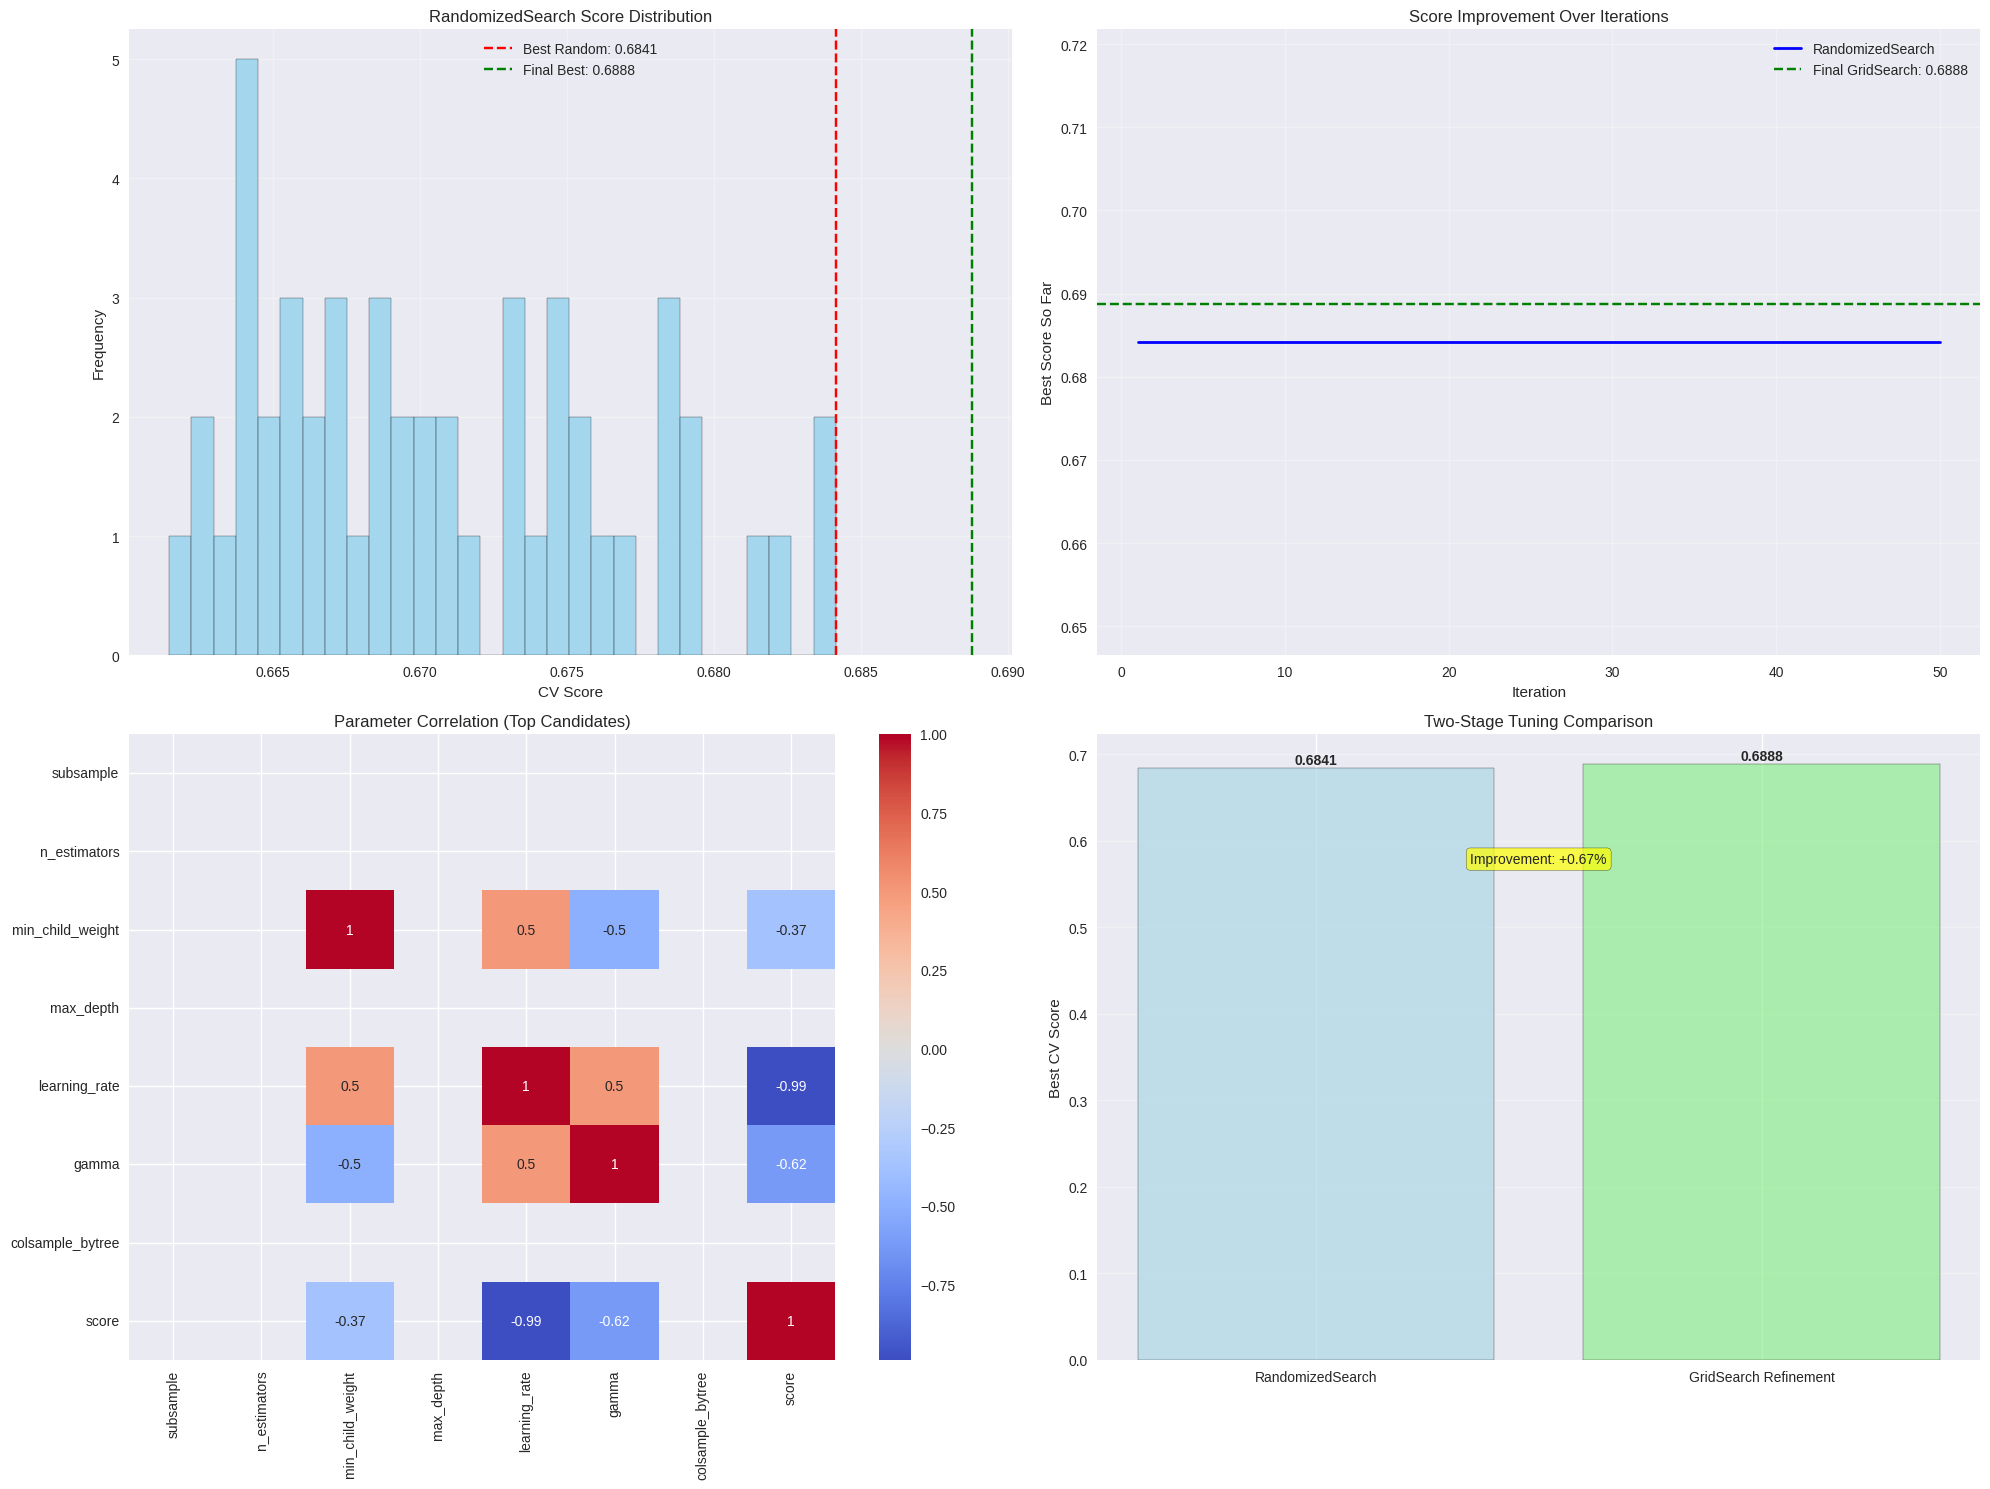


🔮 Making predictions...

📊 MODEL PERFORMANCE SUMMARY
Dataset      Accuracy   Precision  Recall     F1         AUC       
--------------------------------------------------------------------------------
Train        0.6860     0.6242     0.5005     0.5556     0.7504    
Validation   0.6444     0.5720     0.4393     0.4969     0.7076    
Test         0.6246     0.5745     0.4008     0.4721     0.6931    

🎯 KEY METRICS (Test Set):
   🎯 Accuracy: 62.5%
   🎯 AUC Score: 0.693
   🎯 F1 Score: 0.472

🤖 MODEL INFORMATION
📊 Model Type: XGBoost
🎯 Problem Type: classification
📅 Target Period: 10 days
🔧 Tuning Method: two_stage
📋 Number of Features: 26
⏰ Training Time: 189.0 minutes
🏆 Final Best Parameters:
   colsample_bytree: 0.8
   gamma: 0.08
   learning_rate: 0.04
   max_depth: 6
   min_child_weight: 7
   n_estimators: 450
   subsample: 0.64
🎯 Feature Group Weights:
  📈 Trend: 13.4%
  🚀 Momentum: 67.8%
  💰 Value: 18.9%

🔍 Performing SHAP analysis on validation set...
📊 Sampling 500 points fro

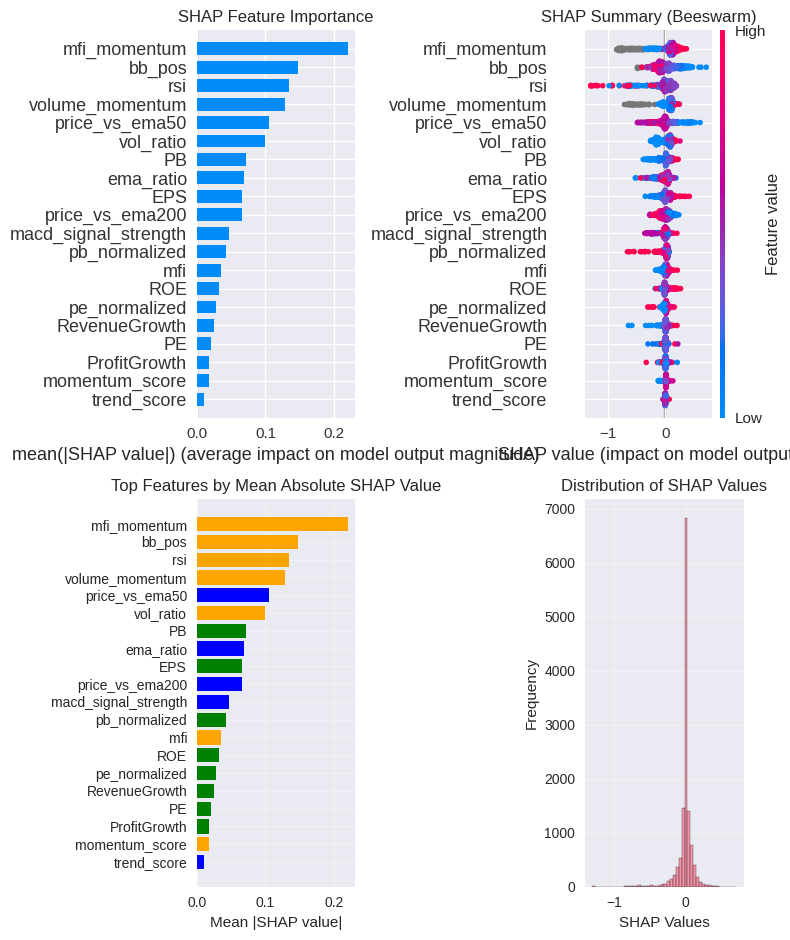


📊 SHAP Analysis Summary:
   🔍 Sample size: 500
   📋 Features analyzed: 26
   📈 Top 20 features displayed
   🎯 Mean absolute SHAP: 0.0539


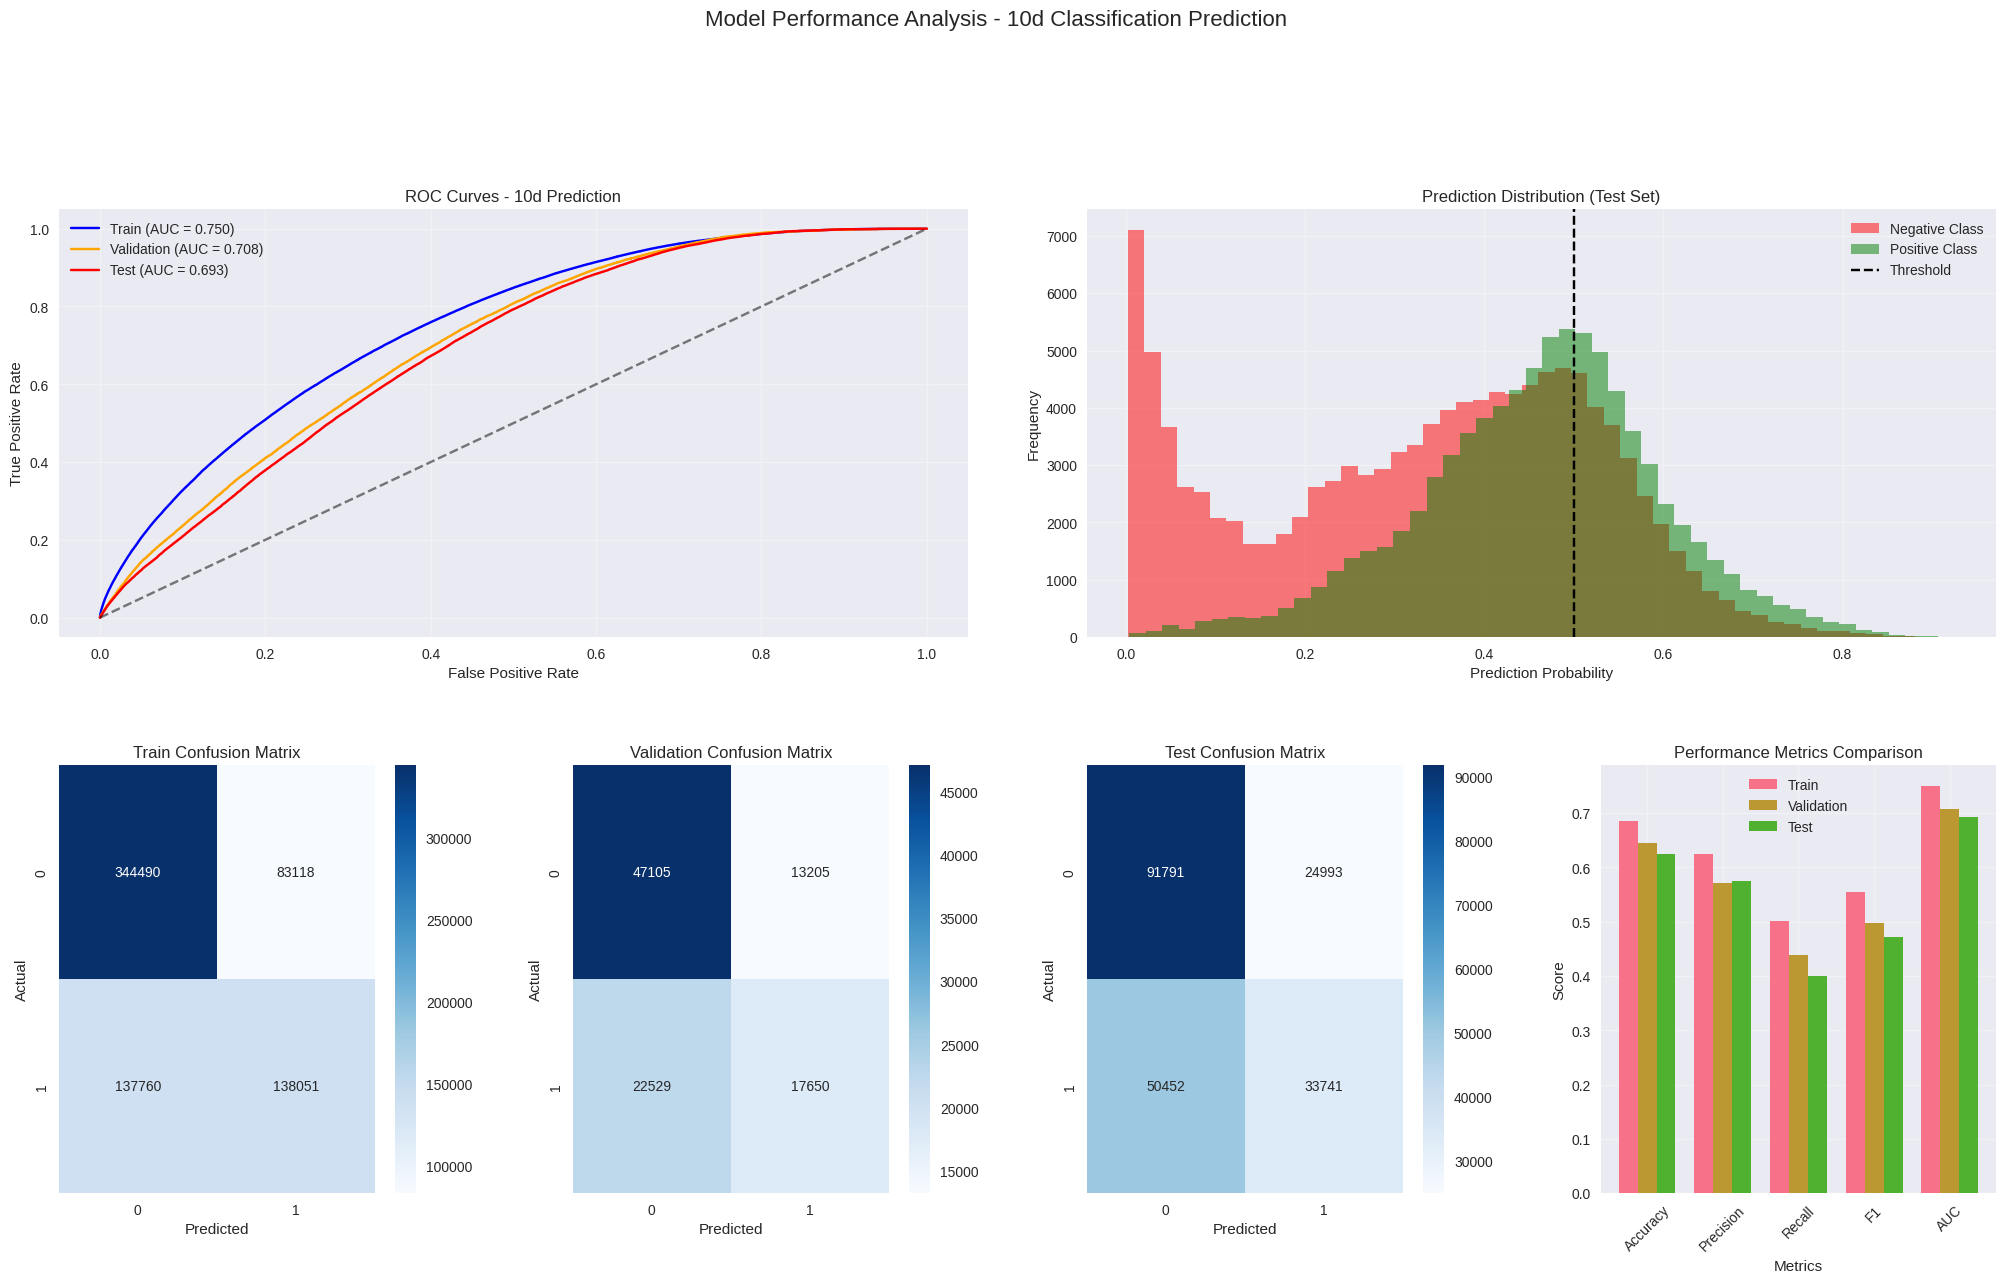


📊 BASELINE COMPARISON
🎯 Model Performance:
   Accuracy: 62.5%
   AUC: 0.693
📊 Majority Class Baseline:
   Accuracy: 58.1%
   Improvement: 4.4%
🎲 Random Baseline:
   AUC: 0.500
   Improvement: 0.193

✅ TWO-STAGE TUNING TRAINING COMPLETED!
✅ Completed: 10d_classification_quick

📊 EXPERIMENT SUMMARY

📋 Results Summary:
              Experiment  Accuracy    AUC     F1  Training_Time
10d_classification_quick    0.6246 0.6931 0.4721       189.0166

💾 Results saved to 'two_stage_tuning_results.csv'


In [16]:
# 2. Multiple experiments
all_results = run_comprehensive_two_stage_experiment(
    data=df_filtered,
    target_periods=[10],
    problem_types=['classification'],
    param_configs=['quick']
)